In [1]:
%run ipo_functions.py
data_path,figure_path,overleaf_path = setup(update=False)

Data path: C:/Users/Taise/Dropbox/IPOMatch/data/
Figure/Table path: C:/Users/Taise/Dropbox/Apps/Overleaf/IPOMatch/tables_figures/
Overleaf path: C:/Users/Taise/Dropbox/Apps/Overleaf/IPOMatch/tables_figures/


In [334]:
sdc_us_common = pd.read_pickle(data_path+'sdc_us_common.pkl')
dsf_v2 = pd.read_pickle(data_path+'dsf_v2.pkl')
#compa = pd.read_pickle(data_path+'compa.pkl')
#compq = pd.read_pickle(data_path+'compq.pkl')
compustat_data = pd.read_pickle(data_path+'compustat_data.pkl')
stkdelists = pd.read_pickle(data_path+'stkdelists.pkl')
crsp_data = pd.read_pickle(data_path+'crsp_data.pkl')
issue_date_table = pd.read_pickle(data_path+'issue_date_table.pkl')
ccm_lookup = pd.read_pickle(data_path+'ccm_lookup.pkl')
uw_performance = pd.read_pickle(data_path+'uw_performance.pkl')


In [342]:
%run ipo_functions.py
constructor = DataConstructor(data_path)
#sdc_us_common = constructor.import_sdc()
#all_matches,firm_lead_matches,uw_code_list = constructor.get_firm_uw_match(sdc_us_common)
#compustat_data = constructor.get_compustat_data(firm_lead_matches)
#text_data = constructor.get_10K_text_data(firm_lead_matches)
#crsp_data = constructor.get_crsp_data(firm_lead_matches)
crsp_performance = constructor.compute_performance(crsp_data)
#ipo_firms1 = constructor.get_ipo_data(firm_lead_matches)
#firms = constructor.merge_firm_data(compustat_data,text_data,crsp_performance,ipo_firms1)
#uw_rank = constructor.construct_uw_rank(all_matches,uw_code_list)
#uw_share = constructor.compute_uw_share(all_matches)
#uw_industry_focus = constructor.describe_industry_focus_stats(all_matches)
#uw_performance = constructor.underwriter_performance(crsp_performance,all_matches)
#uw_data = constructor.merge_uw_data(uw_rank,uw_share,uw_performance,firms,firm_lead_matches)


# Fernando

# Data Description

In [352]:
issue_count = firms.groupby(['ipo_flag','issueyear'])['CUSIP'].nunique().reset_index()
issue_count = pd.pivot_table(issue_count,index=['issueyear'],columns=['ipo_flag'],values=['CUSIP']).reset_index()
issue_count.columns = ['issueyear','SEO Firms','IPO Firms']
issue_count = issue_count[issue_count['issueyear']>=1980]
lead_uw_data = uw_data[(uw_data['lead_ipo_amount']>0) | (uw_data['lead_seo_amount']>0)].reset_index(drop=True)
lead_uw_data['ipo_lead'] = np.where(lead_uw_data['lead_ipo_amount']>0,1,0)
lead_uw_count = lead_uw_data.groupby(['issueyear','ipo_lead'])['mng_prt_code'].nunique().reset_index()
lead_uw_count = pd.pivot_table(lead_uw_count,index=['issueyear'],columns=['ipo_lead'],values=['mng_prt_code']).reset_index()
lead_uw_count.columns = ['issueyear','IPO Lead UWs','SEO Lead UWs']
lead_uw_count = lead_uw_count[lead_uw_count['issueyear']>=1980]
firms_uw_count = issue_count.merge(lead_uw_count,on='issueyear',how='inner').rename(columns={'issueyear':'Year'})
firms_uw_count = firms_uw_count[['Year','IPO Firms','IPO Lead UWs','SEO Firms','SEO Lead UWs']].dropna().astype(int)
firms_uw_count.index = firms_uw_count['Year']
firms_uw_count = firms_uw_count.drop(columns=['Year'])
firms_uw_count.style.to_latex(overleaf_path+'firms_uw_count.tex',hrules=True)
firms_uw_count

,IPO Firms,IPO Lead UWs,SEO Firms,SEO Lead UWs
Year,,,,
1980,42,20,375,35
1981,108,11,503,72
1982,48,4,368,42
1983,280,4,825,93
1984,122,6,271,58
1985,134,6,313,57
1986,251,11,440,94
1987,196,4,343,86
1988,55,8,174,42


In [346]:
overleaf_path

'C:/Users/Taise/Dropbox/Apps/Overleaf/IPOMatch/'

In [333]:
characteristics  = ['at','revt','ebitda','ipo_ir','ipo_mean','ipo_vol','ipo_sr','N_Unique_Words','firmage','as_analyst','asru_analyst','analyst']
firms.columns

Index(['CUSIP', 'mainsiccode', 'prt_cusip', 'ult_cusip', 'issue_date', 'gvkey',
       'datadate', 'fyr', 'at', 'dlc', 'revt', 'ebitda', 'sale', 'ebit', 'atq',
       'dlcq', 'revtq', 'oeps12', 'epspxq', 'filing_date', 'cik', 'N_Words',
       'N_Unique_Words', 'N_Negative', 'N_Positive', 'N_Uncertainty',
       'N_Litigious', 'N_StrongModal', 'N_WeakModal', 'N_Constraining',
       'N_Negation', 'Ratio_Negative', 'Ratio_Positive', 'Ratio_Uncertainty',
       'Ratio_Litigious', 'Ratio_StrongModal', 'Ratio_WeakModal',
       'Ratio_Constraining', 'Ratio_Negation', 'date_diff',
       'compustat_text_merge', 'permno', 'ipo_issue_date', 'ipo_ir',
       'ipo_mean', 'ipo_vol', 'ipo_sr', 'ipo_crsp_merge', 'seo1_issue_date',
       'seo1_ir', 'seo1_exante_mean', 'seo1_exante_vol', 'seo1_exante_sr',
       'seo1_mean', 'seo1_vol', 'seo1_sr', 'seo1_crsp_merge', 'CUSIP9',
       'ipo_flag', 'offer_price', 'issuedate', 'IPOname', 'Ticker', 'Rollup',
       'Dual', 'PostIssueShares', 'Internet', 

In [274]:
uw_data[['rank', 'co_seo_amount',
       'co_ipo_amount', 'lead_seo_amount', 'lead_ipo_amount',
       'co_total_amount', 'lead_total_amount', 'ipo_total_amount',
       'seo_total_amount', 'co_total_amount_sum', 'lead_total_amount_sum',
       'ipo_total_amount_sum', 'seo_total_amount_sum', 'co_seo_amount_sum',
       'lead_seo_amount_sum', 'co_ipo_amount_sum', 'lead_ipo_amount_sum',
       'co_total_amount_share', 'lead_total_amount_share',
       'ipo_total_amount_share', 'seo_total_amount_share',
       'co_seo_amount_share', 'lead_seo_amount_share', 'co_ipo_amount_share',
       'lead_ipo_amount_share', 'uw_ipo_ir_premium', 'uw_ipo_vol_premium',
       'uw_ipo_sr_premium', 'VCinGC', 'firmage', 'as_analyst', 'asru_analyst',
       'analyst']].corr()

,rank,co_seo_amount,co_ipo_amount,lead_seo_amount,lead_ipo_amount,co_total_amount,lead_total_amount,ipo_total_amount,seo_total_amount,co_total_amount_sum,...,co_ipo_amount_share,lead_ipo_amount_share,uw_ipo_ir_premium,uw_ipo_vol_premium,uw_ipo_sr_premium,VCinGC,firmage,as_analyst,asru_analyst,analyst
rank,1.000000,0.386833,0.340634,0.416723,0.371360,0.373799,0.416510,0.396161,0.449977,0.147710,...,0.386873,0.436984,0.002541,-0.255247,0.137647,0.266413,0.183037,0.410284,0.429582,0.428127
co_seo_amount,0.386833,1.000000,0.927134,0.588122,0.637883,0.986588,0.629363,0.834146,0.801847,0.256131,...,0.672583,0.585340,0.040019,-0.068630,0.053374,0.069981,0.156656,0.212211,0.305443,0.300097
co_ipo_amount,0.340634,0.927134,1.000000,0.541148,0.628194,0.975867,0.594160,0.860539,0.740376,0.281913,...,0.691587,0.509109,0.030583,-0.061447,0.040436,0.073825,0.150062,0.180587,0.260601,0.251376
lead_seo_amount,0.416723,0.588122,0.541148,1.000000,0.837473,0.578439,0.979893,0.791404,0.954849,0.225355,...,0.404306,0.710439,0.054295,-0.081997,0.087011,0.204677,0.118280,0.406886,0.457421,0.452783
lead_ipo_amount,0.371360,0.637883,0.628194,0.837473,1.000000,0.645353,0.929669,0.936916,0.853051,0.257471,...,0.425075,0.736258,0.055151,-0.065367,0.074430,0.164901,0.133096,0.383163,0.454589,0.451029
co_total_amount,0.373799,0.986588,0.975867,0.578439,0.645353,1.000000,0.625564,0.860931,0.789766,0.272056,...,0.693188,0.562862,0.036625,-0.066800,0.048645,0.073078,0.156884,0.201545,0.290390,0.283249
lead_total_amount,0.416510,0.629363,0.594160,0.979893,0.929669,0.625564,1.000000,0.875580,0.955144,0.245922,...,0.427751,0.747738,0.057198,-0.079722,0.086565,0.197947,0.128844,0.408190,0.468470,0.464143
ipo_total_amount,0.396161,0.834146,0.860539,0.791404,0.936916,0.860931,0.875580,1.000000,0.891110,0.295218,...,0.588999,0.710745,0.050657,-0.071439,0.068193,0.143306,0.156083,0.314605,0.395451,0.388913
seo_total_amount,0.449977,0.801847,0.740376,0.954849,0.853051,0.789766,0.955144,0.891110,1.000000,0.260581,...,0.545770,0.739897,0.055936,-0.087500,0.086076,0.177749,0.146224,0.347770,0.419472,0.414260
co_total_amount_sum,0.147710,0.256131,0.281913,0.225355,0.257471,0.272056,0.245922,0.295218,0.260581,1.000000,...,-0.073621,-0.015722,0.103622,-0.028495,-0.005854,0.287623,0.014665,-0.121566,-0.101056,-0.103496


# Prep for Matching Estimation

In [359]:
matching_firms = pd.read_csv(data_path+'ipo_issuers2_rank_match_mult2.csv')
matching_uws = pd.read_csv(data_path+'uw_panel_r3_ranked2_mult2.csv')
matching_ind = pd.read_csv(data_path+'uw_industry_matches_mult2.csv')

In [362]:
matching_firms[['permno','uwid','issueyear','sale','earning','l_totproc_3yr_rm','Rank','focus_ind']].drop_duplicates()

,permno,uwid,issueyear,sale,earning,l_totproc_3yr_rm,Rank,focus_ind
0,3712,444.0,1989,0.776471,1,0.656250,0.218750,1.0
1,5637,903.0,1997,0.869674,1,0.711340,0.570248,0.0
2,5347,903.0,1997,0.293233,1,0.711340,0.570248,0.0
3,5624,903.0,1997,0.135338,1,0.711340,0.570248,0.0
4,5456,903.0,1997,0.330827,0,0.711340,0.570248,0.0
...,...,...,...,...,...,...,...,...
7490,8049,960.0,2007,0.741036,1,0.468750,0.264706,1.0
7491,5455,1207.0,1997,0.859649,1,0.752577,0.570248,1.0
7492,5509,896.0,1997,0.789474,1,0.391753,0.338843,1.0
7493,2278,632.0,2016,0.965517,1,0.950000,0.613636,1.0


In [370]:
firm_numbers = matching_ind[matching_ind['issueyear']==1986].permno.nunique()
uw_numbers = matching_ind[matching_ind['issueyear']==1986].uwid.nunique()
print(firm_numbers,uw_numbers,firm_numbers*uw_numbers)
print(len(matching_ind[matching_ind['issueyear']==1986]))



195 46 8970
8970


In [368]:
matching_ind.sort_values(by=['permno','permno2','issueyear']).head(50)


,permno2,FF_12,IssueYear,IssueDate,uwid,actual,ff12_pct_rank,focus_ind,issueyear,permno
71410,1,3,1986,1986-01-16,19.0,0.0,0.400000,0.0,1986,1
71411,1,3,1986,1986-01-16,22.0,0.0,0.000000,0.0,1986,1
71412,1,3,1986,1986-01-16,27.0,0.0,0.000000,0.0,1986,1
71413,1,3,1986,1986-01-16,31.0,0.0,0.000000,0.0,1986,1
71414,1,3,1986,1986-01-16,102.0,0.0,0.000000,0.0,1986,1
71415,1,3,1986,1986-01-16,140.0,0.0,1.000000,1.0,1986,1
71416,1,3,1986,1986-01-16,202.0,0.0,1.000000,1.0,1986,1
71417,1,3,1986,1986-01-16,264.0,0.0,0.000000,0.0,1986,1
71418,1,3,1986,1986-01-16,272.0,0.0,0.333333,0.0,1986,1
71419,1,3,1986,1986-01-16,291.0,0.0,0.833333,0.0,1986,1


In [255]:
uw_data.columns

Index(['mng_prt_code', 'issueyear', 'manager_name', 'rank', 'co_seo_amount',
       'co_ipo_amount', 'lead_seo_amount', 'lead_ipo_amount',
       'co_total_amount', 'lead_total_amount', 'ipo_total_amount',
       'seo_total_amount', 'co_total_amount_sum', 'lead_total_amount_sum',
       'ipo_total_amount_sum', 'seo_total_amount_sum', 'co_seo_amount_sum',
       'lead_seo_amount_sum', 'co_ipo_amount_sum', 'lead_ipo_amount_sum',
       'co_total_amount_share', 'lead_total_amount_share',
       'ipo_total_amount_share', 'seo_total_amount_share',
       'co_seo_amount_share', 'lead_seo_amount_share', 'co_ipo_amount_share',
       'lead_ipo_amount_share', 'uw_ipo_ir_premium', 'uw_ipo_vol_premium',
       'uw_ipo_sr_premium'],
      dtype='object')

In [251]:
uw_data[['mng_prt_code','issueyear','manager_name','rank']].sort_values(by=['mng_prt_code','issueyear']).head(50)

,mng_prt_code,issueyear,manager_name,rank
5398,,2021,Clarksons Platou Securities AS,6.0
5503,,2022,Clarksons Platou Securities AS,6.0
1167,A-M-LEVINE,1988,"A. M. Levine & Co., Inc.",2.0
1325,A-M-LEVINE,1990,"A. M. Levine & Co., Inc.",2.0
1601,A-S-GOLD,1992,A.S. Goldmen & Company,1.0
1872,A-S-GOLD,1993,A.S. Goldmen & Company,1.0
2038,A-S-GOLD,1994,A.S. Goldmen & Company,1.0
2184,A-S-GOLD,1995,A.S. Goldmen & Company,1.0
2513,A-S-GOLD,1996,A.S. Goldmen & Company,1.0
2738,A-S-GOLD,1997,A.S. Goldmen & Company,1.0


In [249]:
uw_data.columns

Index(['mng_prt_code', 'issueyear', 'manager_name', 'rank', 'co_seo_amount',
       'co_ipo_amount', 'lead_seo_amount', 'lead_ipo_amount',
       'co_total_amount', 'lead_total_amount', 'ipo_total_amount',
       'seo_total_amount', 'co_total_amount_sum', 'lead_total_amount_sum',
       'ipo_total_amount_sum', 'seo_total_amount_sum', 'co_seo_amount_sum',
       'lead_seo_amount_sum', 'co_ipo_amount_sum', 'lead_ipo_amount_sum',
       'co_total_amount_share', 'lead_total_amount_share',
       'ipo_total_amount_share', 'seo_total_amount_share',
       'co_seo_amount_share', 'lead_seo_amount_share', 'co_ipo_amount_share',
       'lead_ipo_amount_share', 'uw_ipo_ir_premium', 'uw_ipo_vol_premium',
       'uw_ipo_sr_premium'],
      dtype='object')

In [242]:
firms.columns

Index(['CUSIP', 'mainsiccode', 'prt_cusip', 'ult_cusip', 'issue_date', 'gvkey',
       'datadate', 'fyr', 'at', 'dlc', 'revt', 'ebitda', 'sale', 'ebit', 'atq',
       'dlcq', 'revtq', 'oeps12', 'epspxq', 'filing_date', 'cik', 'N_Words',
       'N_Unique_Words', 'N_Negative', 'N_Positive', 'N_Uncertainty',
       'N_Litigious', 'N_StrongModal', 'N_WeakModal', 'N_Constraining',
       'N_Negation', 'Ratio_Negative', 'Ratio_Positive', 'Ratio_Uncertainty',
       'Ratio_Litigious', 'Ratio_StrongModal', 'Ratio_WeakModal',
       'Ratio_Constraining', 'Ratio_Negation', 'date_diff',
       'compustat_text_merge', 'permno', 'ipo_issue_date', 'ipo_ir',
       'ipo_mean', 'ipo_vol', 'ipo_sr', 'ipo_crsp_merge', 'seo1_issue_date',
       'seo1_ir', 'seo1_exante_mean', 'seo1_exante_vol', 'seo1_exante_sr',
       'seo1_mean', 'seo1_vol', 'seo1_sr', 'seo1_crsp_merge', 'ipo_flag',
       'offer_price', 'issuedate', 'IPOname', 'Ticker', 'Rollup', 'Dual',
       'PostIssueShares', 'Internet', 'Founding'

In [246]:
uw_data.columns

Index(['mng_prt_code', 'issueyear', 'manager_name', 'rank', 'co_seo_amount',
       'co_ipo_amount', 'lead_seo_amount', 'lead_ipo_amount',
       'co_total_amount', 'lead_total_amount', 'ipo_total_amount',
       'seo_total_amount', 'co_total_amount_sum', 'lead_total_amount_sum',
       'ipo_total_amount_sum', 'seo_total_amount_sum', 'co_seo_amount_sum',
       'lead_seo_amount_sum', 'co_ipo_amount_sum', 'lead_ipo_amount_sum',
       'co_total_amount_share', 'lead_total_amount_share',
       'ipo_total_amount_share', 'seo_total_amount_share',
       'co_seo_amount_share', 'lead_seo_amount_share', 'co_ipo_amount_share',
       'lead_ipo_amount_share', 'uw_ipo_ir_premium', 'uw_ipo_vol_premium',
       'uw_ipo_sr_premium'],
      dtype='object')

In [244]:
uw_data.columns

Index(['mng_prt_code', 'issueyear', 'manager_name', 'rank', 'co_seo_amount',
       'co_ipo_amount', 'lead_seo_amount', 'lead_ipo_amount',
       'co_total_amount', 'lead_total_amount', 'ipo_total_amount',
       'seo_total_amount', 'co_total_amount_sum', 'lead_total_amount_sum',
       'ipo_total_amount_sum', 'seo_total_amount_sum', 'co_seo_amount_sum',
       'lead_seo_amount_sum', 'co_ipo_amount_sum', 'lead_ipo_amount_sum',
       'co_total_amount_share', 'lead_total_amount_share',
       'ipo_total_amount_share', 'seo_total_amount_share',
       'co_seo_amount_share', 'lead_seo_amount_share', 'co_ipo_amount_share',
       'lead_ipo_amount_share', 'uw_ipo_ir_premium', 'uw_ipo_vol_premium',
       'uw_ipo_sr_premium'],
      dtype='object')

In [239]:
firms.to_pickle(data_path+'firms.pkl')

In [240]:
firms

,CUSIP,mainsiccode,prt_cusip,ult_cusip,issue_date,gvkey,datadate,fyr,at,dlc,...,Internet,Founding,CUSIP8,issueyear,firmage,VCinGC,as_analyst,asru_analyst,analyst,ipo_firms_merge
0,00000A,3724.0,00000A,00000A,1980-06-10,<NA>,NaT,<NA>,<NA>,<NA>,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1,000165,5812.0,000165,000165,1983-09-19,001001,1983-12-31,12,14.08,0.52,...,0.0,1973.0,00016510,1983.0,10.0,0.0,NaN,NaN,NaN,both
2,000209,2086.0,00016Z,00016Z,1987-05-07,013592,1986-12-31,12,115.143,1.292,...,0.0,1919.0,000209106,1987.0,68.0,0.0,NaN,NaN,NaN,both
3,000307,8093.0,000307,000307,2014-09-30,178698,2014-12-31,12,145.952,4.357,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
4,000354,5023.0,000354,000354,1983-12-06,001003,1983-12-31,12,8.529,0.25,...,0.0,1980.0,00035410,1983.0,3.0,0.0,NaN,NaN,NaN,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30794,Y95308,2834.0,Y95308,Y95308,2023-12-05,026340,2023-12-31,12,274.949,6.714,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
30795,Y95308,2834.0,Y95308,Y95308,2015-11-09,026340,2015-12-31,12,165.424,0.062,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
30796,Y95308,2834.0,Y95308,Y95308,2020-09-21,026340,2020-12-31,12,279.238,3.714,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
30797,Y95308,2834.0,Y95308,Y95308,2022-06-13,026340,2021-12-31,12,207.007,4.961,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [238]:
firms2 = firms[(firms['permno'].notna()) & (firms['issue_date'].dt.year>=2001)]
firms2_ciks = firms2.cik.dropna().unique().tolist()
firms2_ciks

[1672688.0,
 1173313.0,
 1637873.0,
 1680062.0,
 1865107.0,
 1833908.0,
 1810182.0,
 1015383.0,
 1580808.0,
 1703057.0,
 1651235.0,
 1817358.0,
 1481646.0,
 1138723.0,
 1130258.0,
 1163932.0,
 1576885.0,
 1736243.0,
 1522860.0,
 1832038.0,
 1319439.0,
 1478320.0,
 1726711.0,
 1104042.0,
 1157377.0,
 868857.0,
 1604028.0,
 1798749.0,
 1368622.0,
 1421419.0,
 1713210.0,
 1129446.0,
 1800637.0,
 1831097.0,
 1420565.0,
 1014763.0,
 1559720.0,
 1870940.0,
 1662524.0,
 1722271.0,
 1744659.0,
 1711933.0,
 1646972.0,
 1653087.0,
 1832466.0,
 1799448.0,
 1529274.0,
 1564824.0,
 1653909.0,
 866291.0,
 1624658.0,
 1823584.0,
 1411207.0,
 1754068.0,
 1850902.0,
 1264388.0,
 1374535.0,
 1677077.0,
 1314223.0,
 1488139.0,
 1324479.0,
 1393584.0,
 1807166.0,
 1161963.0,
 1640313.0,
 1518461.0,
 1540755.0,
 1469433.0,
 1815974.0,
 1491778.0,
 1372813.0,
 1528115.0,
 1431897.0,
 1163842.0,
 1167178.0,
 1492422.0,
 1811109.0,
 1158114.0,
 1801777.0,
 1697532.0,
 1751008.0,
 1405073.0,
 1735803.0,
 17819

In [224]:
firms_data.cik.nunique()

7757

In [217]:
firms_data.permno.nunique()


4724

In [211]:
uw_data[['rank','uw_ipo_ir_premium','uw_ipo_vol_premium','uw_ipo_sr_premium']].corr()

,rank,uw_ipo_ir_premium,uw_ipo_vol_premium,uw_ipo_sr_premium
rank,1.000000,0.002541,-0.255247,0.137647
uw_ipo_ir_premium,0.002541,1.000000,0.187101,0.013556
uw_ipo_vol_premium,-0.255247,0.187101,1.000000,0.074375
uw_ipo_sr_premium,0.137647,0.013556,0.074375,1.000000


In [206]:
uw_share.columns

Index(['mng_prt_code', 'issueyear', 'co_seo_amount', 'co_ipo_amount',
       'lead_seo_amount', 'lead_ipo_amount', 'co_total_amount',
       'lead_total_amount', 'ipo_total_amount', 'seo_total_amount',
       'co_total_amount_sum', 'lead_total_amount_sum', 'ipo_total_amount_sum',
       'seo_total_amount_sum', 'co_seo_amount_sum', 'lead_seo_amount_sum',
       'co_ipo_amount_sum', 'lead_ipo_amount_sum', 'co_total_amount_share',
       'lead_total_amount_share', 'ipo_total_amount_share',
       'seo_total_amount_share', 'co_seo_amount_share',
       'lead_seo_amount_share', 'co_ipo_amount_share',
       'lead_ipo_amount_share'],
      dtype='object')

In [202]:
uw_performance

,CUSIP,mng_prt_code,issue_date,uw_ipo_ir_premium,uw_ipo_vol_premium,uw_ipo_sr_premium
0,724073,ADAMS-JAMES,1981-08-20,NaN,NaN,NaN
1,338520,ADAMS-JAMES,1981-11-09,-0.030487,0.010447,-0.054616
2,928451,ADAMS-JAMES,1983-08-15,0.015214,0.008051,0.181237
3,025910,ADAMS-JAMES,1983-10-05,0.012698,0.008706,0.066184
4,871639,AEGIS-GROUP,2011-11-30,NaN,NaN,NaN
...,...,...,...,...,...,...
10369,496685,WOOLCOTT,1987-04-06,NaN,NaN,NaN
10370,913788,WUNDERLICH,2006-12-19,NaN,NaN,NaN
10371,92347M,WUNDERLICH,2017-05-10,NaN,NaN,NaN
10372,G01125,XP-INVEST,2019-07-17,NaN,NaN,NaN


In [187]:
uw_industry_focus[uw_industry_focus['IPO_Count'] > 1]

,hhi,entropy,top_share,top_share_industry,IPO_Count
mng_prt_code,,,,,
,0.6358,0.6547,0.7778,Other,18
A-M-LEVINE,1.0000,-0.0000,1.0000,Shops,2
A-S-GOLD,0.2347,1.5318,0.3571,Other,14
AARSAND,0.5000,0.6931,0.5000,Nodur,2
ABCHIN,0.5000,0.6931,0.5000,BusEq,2
...,...,...,...,...,...
YAMAICHI,0.2840,1.4271,0.4444,Shops,9
YEE-DESMOND,0.5000,0.6931,0.5000,Other,2
YORKE,0.5000,0.6931,0.5000,BusEq,2


In [191]:
all_matches.columns

Index(['CUSIP', 'CUSIP9', 'ipo_flag', 'prt_cusip', 'ult_cusip', 'mainsiccode',
       'tech', 'ff12', 'issue_date', 'offer_price',
       'principal_amount_this_market', 'manager_name', 'role', 'mng_prt_code',
       'issueyear', 'num_managers', 'num_prt_codes'],
      dtype='object')

In [163]:
num_managers = all_matches.groupby(['CUSIP','issue_date','role'])['mng_prt_code'].nunique().reset_index()
num_managers = num_managers.pivot_table(index=['CUSIP','issue_date'],columns='role',values='mng_prt_code').reset_index()
num_managers.columns = ['CUSIP','issue_date','co_num_managers','lead_num_managers']
num_managers = num_managers.fillna(0)
all_matches2 = all_matches.merge(num_managers,on=['CUSIP','issue_date'],how='inner')
all_matches2['principal_amount_per_lead'] = np.where(all_matches2['lead_num_managers'] > 0,all_matches2['principal_amount_this_market']/all_matches2['lead_num_managers'],0)
all_matches2['principal_amount_per_co'] = np.where(all_matches2['co_num_managers'] > 0,all_matches2['principal_amount_this_market']/all_matches2['co_num_managers'],0)
principal_amount_per_uw = all_matches2[['CUSIP','role','ipo_flag','issueyear','mng_prt_code','principal_amount_per_lead','principal_amount_per_co']].copy()
principal_amount_per_uw['principal_amount_per_uw'] = np.where(principal_amount_per_uw['role'] == 'lead',principal_amount_per_uw['principal_amount_per_lead'],principal_amount_per_uw['principal_amount_per_co'])
principal_amount_per_uw = principal_amount_per_uw.drop(columns=['principal_amount_per_lead','principal_amount_per_co'])

uwshare = principal_amount_per_uw.groupby(['mng_prt_code','issueyear','role','ipo_flag'])['principal_amount_per_uw'].sum().reset_index()
uwshare = uwshare.pivot_table(index=['mng_prt_code','issueyear'],columns=['role','ipo_flag'],values='principal_amount_per_uw').reset_index()
uwshare.columns = ['mng_prt_code','issueyear','co_seo_amount','co_ipo_amount','lead_seo_amount','lead_ipo_amount']
uwshare = uwshare.fillna(0)
uwshare['co_total_amount'] = uwshare['co_seo_amount'] + uwshare['co_ipo_amount']
uwshare['lead_total_amount'] = uwshare['lead_seo_amount'] + uwshare['lead_ipo_amount']
uwshare['ipo_total_amount'] = uwshare['co_ipo_amount'] + uwshare['lead_ipo_amount']
uwshare['seo_total_amount'] = uwshare['co_seo_amount'] + uwshare['lead_seo_amount']
variables = ['co_total_amount','lead_total_amount','ipo_total_amount','seo_total_amount','co_seo_amount','lead_seo_amount','co_ipo_amount','lead_ipo_amount']
uwshare_sum = uwshare.groupby(['issueyear'])[variables].sum().reset_index()
uwshare = uwshare.merge(uwshare_sum,on='issueyear',how='left',suffixes=('','_sum'))
for variable in variables:
    uwshare[variable+'_share'] = uwshare[variable]/uwshare[variable+'_sum']
uwshare







,mng_prt_code,issueyear,co_seo_amount,co_ipo_amount,lead_seo_amount,lead_ipo_amount,co_total_amount,lead_total_amount,ipo_total_amount,seo_total_amount,...,co_ipo_amount_sum,lead_ipo_amount_sum,co_total_amount_share,lead_total_amount_share,ipo_total_amount_share,seo_total_amount_share,co_seo_amount_share,lead_seo_amount_share,co_ipo_amount_share,lead_ipo_amount_share
0,,2015,0.000000,0.000000,26.500000,0.0,0.000000,26.500000,0.000000,26.500000,...,26316.462168,27861.269186,0.000000,0.000168,0.000000,0.000128,0.000000,0.000205,0.000000,0.0
1,,2016,0.000000,0.000000,84.937500,0.0,0.000000,84.937500,0.000000,84.937500,...,11829.176136,12856.159692,0.000000,0.000720,0.000000,0.000558,0.000000,0.000807,0.000000,0.0
2,,2017,40.000000,146.055558,52.000000,0.0,186.055558,52.000000,146.055558,92.000000,...,25346.169323,28639.398630,0.002264,0.000391,0.002705,0.000571,0.000704,0.000498,0.005762,0.0
3,,2018,150.000001,0.000000,0.000000,0.0,150.000001,0.000000,0.000000,150.000001,...,27099.569190,39283.695795,0.001706,0.000000,0.000000,0.000899,0.002466,0.000000,0.000000,0.0
4,,2020,0.000000,0.000000,49.291167,0.0,0.000000,49.291167,0.000000,49.291167,...,53356.933446,66372.793446,0.000000,0.000204,0.000000,0.000172,0.000000,0.000281,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7991,ZELMAN-PART,2021,27.517713,54.884211,0.000000,0.0,82.401924,0.000000,54.884211,27.517713,...,115290.282678,130127.338210,0.000418,0.000000,0.000224,0.000123,0.000336,0.000000,0.000476,0.0
7992,ZIM,1970,0.000000,0.000000,0.300000,0.0,0.000000,0.300000,0.000000,0.300000,...,46.452000,430.287047,0.000000,0.000103,0.000000,0.000081,0.000000,0.000120,0.000000,0.0
7993,ZINVEST-GLOBAL,2019,0.000000,2.750000,0.000000,0.0,2.750000,0.000000,2.750000,0.000000,...,38348.202383,41435.586473,0.000032,0.000000,0.000034,0.000000,0.000000,0.000000,0.000072,0.0
7994,ZIONBCORP,2024,57.320655,0.000000,0.000000,0.0,57.320655,0.000000,0.000000,57.320655,...,19112.234221,22969.837811,0.000671,0.000000,0.000000,0.000303,0.000865,0.000000,0.000000,0.0


In [175]:
# Compute shares by industry
industry_share = industry_dist.div(industry_dist.sum(axis=1), axis=0)

# HHI: concentration measure
hhi = (industry_share ** 2).sum(axis=1).rename('HHI')

# Entropy: diversity measure
entropy = (-industry_share * np.log(industry_share + 1e-10)).sum(axis=1).rename('Entropy')

# Top-Industry Share and Name
top_share = industry_share.max(axis=1).rename('TopShare')
top_share_industry = industry_share.idxmax(axis=1).rename('TopShareIndustry')

# Combine everything
focus_stats = pd.concat([hhi, entropy, top_share, top_share_industry], axis=1)


In [179]:
focus_stats.describe()

,HHI,Entropy,TopShare
count,1573.000000,1.573000e+03,1573.000000
mean,0.637072,6.860465e-01,0.682338
std,0.334414,7.033525e-01,0.298545
min,0.116342,-1.000000e-10,0.133333
25%,0.333333,-1.000000e-10,0.400000
50%,0.537190,6.829081e-01,0.666667
75%,1.000000,1.277034e+00,1.000000
max,1.000000,2.252503e+00,1.000000


In [165]:
uwshare[uwshare['issueyear']==2000].sort_values(by=['issueyear','lead_ipo_amount_share'],ascending=[True,False]).head(50)

,mng_prt_code,issueyear,co_seo_amount,co_ipo_amount,lead_seo_amount,lead_ipo_amount,co_total_amount,lead_total_amount,ipo_total_amount,seo_total_amount,...,co_ipo_amount_sum,lead_ipo_amount_sum,co_total_amount_share,lead_total_amount_share,ipo_total_amount_share,seo_total_amount_share,co_seo_amount_share,lead_seo_amount_share,co_ipo_amount_share,lead_ipo_amount_share
3096,GS,2000,955.633863,397.446112,14096.988259,10069.731181,1353.079974,24166.719439,10467.177292,15052.622121,...,59765.702084,52683.67306,0.009498,0.180542,0.093083,0.091858,0.011556,0.173666,0.006650,0.191136
7369,UBS-BANK,2000,11490.823311,9183.984418,13260.093709,9470.365074,20674.807728,22730.458783,18654.349492,24750.917019,...,59765.702084,52683.67306,0.145126,0.169812,0.165891,0.151041,0.138953,0.163356,0.153666,0.179759
851,BOFA-SEC-INC,2000,11262.206096,6480.101339,16457.255795,8612.310263,17742.307435,25069.566057,15092.411602,27719.461890,...,59765.702084,52683.67306,0.124541,0.187287,0.134215,0.169157,0.136189,0.202744,0.108425,0.163472
1484,CITI,2000,4880.814001,2786.186149,5635.634884,6786.388967,7667.000150,12422.023851,9572.575116,10516.448885,...,59765.702084,52683.67306,0.053818,0.092801,0.085128,0.064176,0.059021,0.069428,0.046618,0.128814
4874,MORGAN-STANLEY,2000,1501.934110,1426.992835,11593.968215,6277.565330,2928.926944,17871.533545,7704.558165,13095.902324,...,59765.702084,52683.67306,0.020559,0.133513,0.068516,0.079917,0.018162,0.142831,0.023876,0.119156
3905,JPM,2000,8542.377146,7254.826629,8620.107575,3427.084960,15797.203775,12047.192535,10681.911589,17162.484721,...,59765.702084,52683.67306,0.110888,0.090001,0.094993,0.104733,0.103299,0.106195,0.121388,0.065050
2138,DEUTSCHE-BANK,2000,3229.071494,3746.643034,1791.205573,1957.985945,6975.714528,3749.191518,5704.628979,5020.277067,...,59765.702084,52683.67306,0.048966,0.028009,0.050731,0.030636,0.039048,0.022067,0.062689,0.037165
473,BARCLAYS-CAP,2000,1849.924426,1671.599858,2919.039531,1601.305652,3521.524285,4520.345183,3272.905510,4768.963957,...,59765.702084,52683.67306,0.024719,0.033770,0.029106,0.029102,0.022370,0.035961,0.027969,0.030395
1379,CHINA-CAPITAL,2000,0.000000,10.909091,0.000000,1093.994382,10.909091,1093.994382,1104.903473,0.000000,...,59765.702084,52683.67306,0.000077,0.008173,0.009826,0.000000,0.000000,0.000000,0.000183,0.020765
1424,CIBC-WORLD,2000,1753.606557,1487.407367,1533.898281,685.160000,3241.013923,2219.058281,2172.567367,3287.504838,...,59765.702084,52683.67306,0.022750,0.016578,0.019320,0.020062,0.021206,0.018897,0.024887,0.013005


In [126]:
temp = all_matches.copy()
uwshare = temp.groupby(['mng_prt_code','issueyear','role','ipo_flag'])['principal_amount_this_market'].sum().reset_index()
uwshare = uwshare.pivot_table(index=['mng_prt_code','issueyear'],columns=['role','ipo_flag'],values='principal_amount_this_market').reset_index()
uwshare.columns = ['mng_prt_code','issueyear','co_amount','lead_amount','co_amount_ipo','lead_amount_ipo']
uwshare = uwshare.fillna(0)
uwshare['total_amount'] = uwshare['co_amount'] + uwshare['lead_amount']
uwshare_sum = uwshare.groupby(['issueyear'])[['co_amount','lead_amount','total_amount']].sum().reset_index().rename(columns={'co_amount':'co_amount_sum','lead_amount':'lead_amount_sum','total_amount':'total_amount_sum'})
uwshare = uwshare.merge(uwshare_sum,on='issueyear',how='left')
uwshare['co_share'] = uwshare['co_amount']/uwshare['co_amount_sum']
uwshare['lead_share'] = uwshare['lead_amount']/uwshare['lead_amount_sum']
uwshare['total_share'] = uwshare['total_amount']/uwshare['total_amount_sum']









In [130]:
uwshare.sort_values(by=['issueyear','total_share'],ascending=[True,False]).head(50)

,mng_prt_code,issueyear,co_amount,lead_amount,total_amount,co_amount_sum,lead_amount_sum,total_amount_sum,co_share,lead_share,total_share
7339,UBS-BANK,1970,645.347703,1158.285294,1803.632997,3361.438139,2983.316715,6344.754854,0.191986,0.388254,0.284272
821,BOFA-SEC-INC,1970,500.611975,461.996468,962.608443,3361.438139,2983.316715,6344.754854,0.148928,0.154860,0.151717
443,BARCLAYS-CAP,1970,353.600175,231.940115,585.540291,3361.438139,2983.316715,6344.754854,0.105193,0.077746,0.092287
4844,MORGAN-STANLEY,1970,235.294368,260.445966,495.740334,3361.438139,2983.316715,6344.754854,0.069998,0.087301,0.078134
3066,GS,1970,201.850000,101.885002,303.735003,3361.438139,2983.316715,6344.754854,0.060049,0.034152,0.047872
1883,CREDIT-AGRI-CIB,1970,281.525000,0.000000,281.525000,3361.438139,2983.316715,6344.754854,0.083751,0.000000,0.044371
6963,STONE-WEB,1970,147.462500,97.162500,244.625000,3361.438139,2983.316715,6344.754854,0.043869,0.032569,0.038555
5369,OPPEN-HOLD,1970,206.837500,1.879500,208.717000,3361.438139,2983.316715,6344.754854,0.061532,0.000630,0.032896
1102,CANACCORD-GROUP,1970,201.850000,0.000000,201.850000,3361.438139,2983.316715,6344.754854,0.060049,0.000000,0.031814
1454,CITI,1970,94.970000,86.687244,181.657244,3361.438139,2983.316715,6344.754854,0.028253,0.029057,0.028631


In [111]:
uw_rank.sort_values(by=['mng_prt_code','Year']).head(50)

,manager_name,issueyear,mng_prt_code,Underwriter Name,Year,rank
5398,Clarksons Platou Securities AS,2021,,Clarksons Platou,2021,6.0
5503,Clarksons Platou Securities AS,2022,,Clarksons Platou,2022,6.0
1167,"A. M. Levine & Co., Inc.",1988,A-M-LEVINE,A. M. Levine,1988,2.0
1325,"A. M. Levine & Co., Inc.",1990,A-M-LEVINE,A. M. Levine,1990,2.0
1601,A.S. Goldmen & Company,1992,A-S-GOLD,A.S. Goldmen & Company,1992,1.0
1872,A.S. Goldmen & Company,1993,A-S-GOLD,A.S. Goldmen & Company,1993,1.0
2038,A.S. Goldmen & Company,1994,A-S-GOLD,A.S. Goldmen & Company,1994,1.0
2184,A.S. Goldmen & Company,1995,A-S-GOLD,A.S. Goldmen & Company,1995,1.0
2513,A.S. Goldmen & Company,1996,A-S-GOLD,A.S. Goldmen & Company,1996,1.0
2738,A.S. Goldmen & Company,1997,A-S-GOLD,A.S. Goldmen & Company,1997,1.0


In [106]:
firms_data.value_counts(['ipo_firms_merge','ipo_crsp_merge'])

ipo_firms_merge  ipo_crsp_merge
left_only        left_only         26064
both             both               3835
left_only        both                900
Name: count, dtype: int64

In [86]:
compustat_data.columns

Index(['CUSIP', 'mainsiccode', 'prt_cusip', 'ult_cusip', 'issue_date', 'gvkey',
       'datadate', 'fyr', 'at', 'dlc', 'revt', 'ebitda', 'sale', 'ebit', 'atq',
       'dlcq', 'revtq', 'oeps12', 'epspxq'],
      dtype='object')

In [87]:
text_data.columns

Index(['filing_date', 'CUSIP', 'cik', 'N_Words', 'N_Unique_Words',
       'N_Negative', 'N_Positive', 'N_Uncertainty', 'N_Litigious',
       'N_StrongModal', 'N_WeakModal', 'N_Constraining', 'N_Negation',
       'Ratio_Negative', 'Ratio_Positive', 'Ratio_Uncertainty',
       'Ratio_Litigious', 'Ratio_StrongModal', 'Ratio_WeakModal',
       'Ratio_Constraining', 'Ratio_Negation', 'issue_date', 'date_diff'],
      dtype='object')

In [89]:
crsp_performance.columns

Index(['CUSIP', 'ipo_issue_date', 'ipo_flag', 'offer_price', 'permno',
       'seo1_issue_date', 'seo2_issue_date', 'seo3_issue_date',
       'seo4_issue_date', 'seo5_issue_date', 'seo6_issue_date',
       'seo7_issue_date', 'seo8_issue_date', 'seo9_issue_date',
       'seo10_issue_date', 'seo11_issue_date', 'seo12_issue_date',
       'seo13_issue_date', 'seo14_issue_date', 'seo15_issue_date',
       'seo16_issue_date', 'seo17_issue_date', 'seo18_issue_date',
       'seo19_issue_date', 'ipo_ir', 'seo1_ir', 'seo2_ir', 'seo3_ir',
       'ipo_mean', 'ipo_vol', 'ipo_sr', 'seo1_mean', 'seo1_vol', 'seo1_sr',
       'seo1_exante_mean', 'seo1_exante_vol', 'seo1_exante_sr'],
      dtype='object')

In [72]:
compustat_data.permno.nunique()

AttributeError: 'DataFrame' object has no attribute 'permno'

In [78]:
compustat_data.permno.nunique()

AttributeError: 'DataFrame' object has no attribute 'permno'

In [42]:
firms_merged

Index(['CUSIP', 'mainsiccode_x', 'prt_cusip_x', 'ult_cusip_x', 'issue_date',
       'conm', 'permno', 'CUSIP9_x', 'gvkey', 'cik_x', 'datadate', 'fyr', 'at',
       'dlc', 'revt', 'ebitda', 'sale', 'ebit', 'atq', 'dlcq', 'revtq',
       'oeps12', 'epspxq', 'filing_date', 'cik_y', 'N_Words', 'N_Unique_Words',
       'N_Negative', 'N_Positive', 'N_Uncertainty', 'N_Litigious',
       'N_StrongModal', 'N_WeakModal', 'N_Constraining', 'N_Negation',
       'Ratio_Negative', 'Ratio_Positive', 'Ratio_Uncertainty',
       'Ratio_Litigious', 'Ratio_StrongModal', 'Ratio_WeakModal',
       'Ratio_Constraining', 'Ratio_Negation', 'date_diff',
       'compustat_text_merge', 'ipo_issue_date', 'ipo_ir', 'ipo_mean',
       'ipo_vol', 'ipo_sr', 'ipo_crsp_merge', 'seo1_issue_date', 'seo1_ir',
       'seo1_exante_mean', 'seo1_exante_vol', 'seo1_exante_sr', 'seo1_mean',
       'seo1_vol', 'seo1_sr', 'seo1_crsp_merge', 'CUSIP9_y', 'ipo_flag',
       'mainsiccode_y', 'prt_cusip_y', 'ult_cusip_y', 'offer_price

In [82]:
crsp_performance.to_pickle(data_path+'crsp_performance.pkl')

In [79]:
crsp_performance.permno.nunique()

8385

In [31]:
compustat_data.columns

Index(['CUSIP', 'mainsiccode', 'prt_cusip', 'ult_cusip', 'issue_date', 'conm',
       'permno', 'CUSIP9', 'gvkey', 'cik', 'datadate', 'fyr', 'at', 'dlc',
       'revt', 'ebitda', 'sale', 'ebit', 'atq', 'dlcq', 'revtq', 'oeps12',
       'epspxq'],
      dtype='object')

In [30]:
text_data.columns

Index(['filing_date', 'CUSIP', 'cik', 'permno', 'N_Words', 'N_Unique_Words',
       'N_Negative', 'N_Positive', 'N_Uncertainty', 'N_Litigious',
       'N_StrongModal', 'N_WeakModal', 'N_Constraining', 'N_Negation',
       'Ratio_Negative', 'Ratio_Positive', 'Ratio_Uncertainty',
       'Ratio_Litigious', 'Ratio_StrongModal', 'Ratio_WeakModal',
       'Ratio_Constraining', 'Ratio_Negation', 'issue_date', 'date_diff'],
      dtype='object')

In [36]:
crsp_performance.ipo_flag

,CUSIP,ipo_issue_date,ipo_flag,offer_price,permno,seo1_issue_date,seo2_issue_date,seo3_issue_date,seo4_issue_date,seo5_issue_date,...,seo3_ir,ipo_mean,ipo_vol,ipo_sr,seo1_mean,seo1_vol,seo1_sr,seo1_exante_mean,seo1_exante_vol,seo1_exante_sr
0,NaN,NaT,NaN,NaN,10001.0,2010-11-09,2012-06-26,2013-10-29,NaT,NaT,...,0.04,<NA>,<NA>,<NA>,-0.002066,0.019939,-0.10364,-0.000368,0.009749,-0.037797
1,819491,1982-05-02,True,3.0,10007.0,NaT,NaT,NaT,NaT,NaT,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,365473,1986-01-15,True,13.5,10008.0,1987-04-15,NaT,NaT,NaT,NaT,...,<NA>,0.006369,0.020892,0.304878,0.006364,0.027774,0.229135,-0.001041,0.027152,-0.038328
3,NaN,NaT,NaN,NaN,10011.0,1995-10-09,NaT,NaT,NaT,NaT,...,<NA>,<NA>,<NA>,<NA>,-0.004697,0.034782,-0.135049,0.001257,0.03023,0.041568
4,000165,1983-09-19,True,6.5,10015.0,NaT,NaT,NaT,NaT,NaT,...,<NA>,0.004178,0.037682,0.110875,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9037,42983D,2010-06-15,True,12.0,93418.0,NaT,NaT,NaT,NaT,NaT,...,<NA>,0.000403,0.021739,0.018558,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
9038,674215,2010-06-15,True,14.0,93420.0,2015-03-03,2016-10-17,2017-12-10,NaT,NaT,...,-0.281429,0.004712,0.026502,0.177813,0.004877,0.035939,0.135694,0.002255,0.063508,0.035508
9039,G3323L,2010-06-23,True,10.0,93427.0,2011-03-02,2013-03-13,2014-05-27,NaT,NaT,...,0.99,-0.001177,0.011323,-0.103938,-0.012618,0.060138,-0.209818,0.009754,0.042996,0.22686
9040,11133B,2010-06-15,True,9.0,93428.0,2010-12-14,NaT,NaT,NaT,NaT,...,<NA>,0.002457,0.02405,0.102159,0.005131,0.051137,0.100347,0.022406,0.038248,0.585809


In [34]:
ipo_firms.columns

Index(['CUSIP', 'CUSIP9', 'issue_date', 'ipo_flag', 'mainsiccode', 'prt_cusip',
       'ult_cusip', 'offer_price', 'issuedate', 'IPOname', 'Ticker', 'Rollup',
       'Dual', 'PostIssueShares', 'Internet', 'permno', 'Founding', 'CUSIP8',
       'issueyear', 'firmage', 'VCinGC', 'as_analyst', 'asru_analyst',
       'analyst'],
      dtype='object')

In [11]:
crsp_performance.columns

Index(['permno', 'dlycaldt', 'dlyprc', 'dlyret', 'CUSIP', 'ipo_issue_date',
       'seo1_issue_date', 'seo2_issue_date', 'seo3_issue_date'],
      dtype='object')

In [107]:
crsp_performance.columns

Index(['permno', 'expost_mean', 'expost_vol', 'expost_sr', 'exante_mean',
       'exante_vol', 'exante_sr', 'initial_return'],
      dtype='object')

,CUSIP,issue_date,ipo_flag,permno
1,121373,1970-01-05,True,19829.0
2,401491,1970-01-07,True,40337.0
6,191563,1970-01-12,True,24388.0
8,823118,1970-01-12,True,54383.0
16,780759,1970-01-13,True,10413.0
...,...,...,...,...
44328,98980W,2024-12-03,True,26037.0
44332,47760D,2024-12-04,True,26006.0
44361,81764X,2024-12-10,True,25886.0
44372,G6427C,2024-12-11,True,26011.0


In [88]:
issue_date_table = pd.read_pickle(data_path+'issue_date_table.pkl')
issue_date_table

,CUSIP,CUSIP9,issue_date,ipo_flag,mainsiccode,prt_cusip,ult_cusip,offer_price
0,205137,NaN,1970-01-04,True,3577.0,205137,205137,8.00
1,121373,NaN,1970-01-05,True,7999.0,121373,121373,8.00
2,225275,NaN,1970-01-05,True,7999.0,225275,225275,5.00
3,364847,NaN,1970-01-06,True,5099.0,364847,364847,22.50
4,205397,NaN,1970-01-07,True,7359.0,205397,205397,14.00
...,...,...,...,...,...,...,...,...
30624,30052F,30052F100,2024-12-16,False,3694.0,30052F,30052F,5.00
30625,G64627,NaN,2024-12-16,True,4731.0,G64627,G64627,4.00
30626,28617B,28617B606,2024-12-17,False,3691.0,28617B,28617B,2.15
30627,45783Q,45783Q100,2024-12-17,False,8731.0,45783Q,45783Q,4.25


In [92]:
ipo_issue_date_table

,CUSIP,ipo_issue_date,ipo_flag,offer_price,permno
5148,819491,1982-05-02,True,3.00,10007.0
8301,365473,1986-01-15,True,13.50,10008.0
6709,000165,1983-09-19,True,6.50,10015.0
8309,206709,1986-01-23,True,20.00,10017.0
8311,449507,1986-01-23,True,11.25,10019.0
...,...,...,...,...,...
29198,42983D,2010-06-15,True,12.00,93418.0
29201,674215,2010-06-15,True,14.00,93420.0
29211,G3323L,2010-06-23,True,10.00,93427.0
29196,11133B,2010-06-15,True,9.00,93428.0


In [94]:
import pandas as pd

# Step 1: Extract IPO dates
issue_date_table = pd.read_pickle(data_path+'issue_date_table.pkl')
issue_date_table = issue_date_table[['CUSIP','issue_date','ipo_flag','offer_price']]
ccm_lookup = pd.read_pickle(data_path+'ccm_lookup.pkl')
issue_date_table = issue_date_table.merge(ccm_lookup[['CUSIP','permno']].drop_duplicates(),on='CUSIP',how='inner').dropna()
ipo_issue_date_table = issue_date_table[issue_date_table['ipo_flag'] == 1]
ipo_issue_date_table = (
    ipo_issue_date_table.sort_values(by=['permno', 'issue_date'])
    .drop_duplicates(subset=['permno'], keep='first')
    .rename(columns={'issue_date': 'ipo_issue_date'})
)

# Step 2: Extract SEO dates and assign rank
seo_issue_date_table = issue_date_table[issue_date_table['ipo_flag'] == 0].copy()
seo_issue_date_table = seo_issue_date_table.sort_values(by=['permno', 'issue_date'])
seo_issue_date_table['seo_rank'] = seo_issue_date_table.groupby('permno').cumcount() + 1  # Rank SEOs

# Step 3: Pivot SEO dates to wide format
seo_wide = seo_issue_date_table.pivot(index='permno', columns='seo_rank', values='issue_date')

# Rename columns to 'seoX_issue_date'
seo_wide.columns = [f'seo{int(col)}_issue_date' for col in seo_wide.columns]

# Step 4: Merge IPO and SEO tables
issue_date_wide = ipo_issue_date_table.merge(seo_wide, on='permno', how='outer')
issue_date_wide = issue_date_wide[['permno','ipo_issue_date','seo1_issue_date','seo2_issue_date','seo3_issue_date']].reset_index(drop=True)
crsp_data2 = crsp_data[['permno','dlycaldt','dlyprc','dlyret']].reset_index(drop=True)
crsp_data2 = issue_date_table[['permno','CUSIP','offer_price']].drop_duplicates(subset=['permno']).reset_index(drop=True).merge(crsp_data2,on='permno',how='inner')
crsp_data2 = crsp_data2.merge(issue_date_wide,on='permno',how='inner')
crsp_data2

,permno,CUSIP,offer_price,dlycaldt,dlyprc,dlyret,ipo_issue_date,seo1_issue_date,seo2_issue_date,seo3_issue_date
0,19829.0,121373,8.0,1973-01-12,5.25,<NA>,1970-01-05,NaT,NaT,NaT
1,19829.0,121373,8.0,1973-01-15,5.5,0.047619,1970-01-05,NaT,NaT,NaT
2,19829.0,121373,8.0,1973-01-16,5.5,0.0,1970-01-05,NaT,NaT,NaT
3,19829.0,121373,8.0,1973-01-17,5.5,0.0,1970-01-05,NaT,NaT,NaT
4,19829.0,121373,8.0,1973-01-18,5.125,-0.068182,1970-01-05,NaT,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...
30779309,78189.0,714157,10.0,2024-12-24,10.59,0.010496,NaT,2024-12-17,NaT,NaT
30779310,78189.0,714157,10.0,2024-12-26,11.14,0.051936,NaT,2024-12-17,NaT,NaT
30779311,78189.0,714157,10.0,2024-12-27,10.85,-0.026032,NaT,2024-12-17,NaT,NaT
30779312,78189.0,714157,10.0,2024-12-30,10.87,0.001843,NaT,2024-12-17,NaT,NaT


In [102]:
crsp_data2.dropna(subset=['ipo_issue_date']).permno.nunique()

5089

In [103]:
date_variable = 'seo1_issue_date'
day_window = 30
perf = crsp_data2.dropna(subset=['dlyret',date_variable]).reset_index(drop=True)
perf['date_diff'] = np.abs((perf['dlycaldt'] - perf[date_variable]).dt.days)
expost_perf = perf[(perf['date_diff'] <= day_window) & (perf['dlycaldt'] >= perf[date_variable])]
expost_perf = expost_perf.groupby(['permno'])['dlyret'].agg(['mean','std']).rename(columns={'mean':'expost_mean','std':'expost_vol'})
expost_perf['expost_sr'] = expost_perf['expost_mean']/expost_perf['expost_vol']
exante_perf =perf[(perf['date_diff'] <= day_window) & (perf['dlycaldt'] < perf[date_variable])]
exante_perf = exante_perf.groupby(['permno'])['dlyret'].agg(['mean','std']).rename(columns={'mean':'exante_mean','std':'exante_vol'})
exante_perf['exante_sr'] = exante_perf['exante_mean']/exante_perf['exante_vol']
perf = expost_perf.merge(exante_perf,on='permno',how='outer')
perf = perf.merge(initial_return[['permno','initial_return']],on='permno',how='outer')


In [104]:
perf

,permno,expost_mean,expost_vol,expost_sr,exante_mean,exante_vol,exante_sr,initial_return
0,10001.0,-0.002066,0.019939,-0.10364,-0.000368,0.009749,-0.037797,<NA>
1,10007.0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0.291667
2,10008.0,0.006364,0.027774,0.229135,-0.001041,0.027152,-0.038328,0.041667
3,10011.0,-0.004697,0.034782,-0.135049,0.001257,0.03023,0.041568,<NA>
4,10015.0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0.009615
...,...,...,...,...,...,...,...,...
8459,93418.0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0.189167
8460,93420.0,0.004877,0.035939,0.135694,0.002255,0.063508,0.035508,0.062857
8461,93427.0,-0.012618,0.060138,-0.209818,0.009754,0.042996,0.22686,0.075
8462,93428.0,0.005131,0.051137,0.100347,0.022406,0.038248,0.585809,-0.077778


In [67]:
import pandas as pd

# Step 1: Extract IPO dates
issue_date_table = pd.read_pickle(data_path+'issue_date_table.pkl')
issue_date_table = issue_date_table[['CUSIP','issue_date','ipo_flag']]
ccm_lookup = pd.read_pickle(data_path+'ccm_lookup.pkl')
issue_data_table = issue_date_table.merge(ccm_lookup[['CUSIP','permno']].drop_duplicates(),on='CUSIP',how='inner')


,CUSIP,ipo_issue_date,ipo_flag,seo1_issue_date,seo2_issue_date,seo3_issue_date
0,00000A,NaT,NaN,1980-06-10,NaT,NaT
1,000165,1983-09-19,True,NaT,NaT,NaT
2,000209,1987-05-07,True,NaT,NaT,NaT
3,000307,2014-09-30,True,NaT,NaT,NaT
4,000354,1983-12-06,True,NaT,NaT,NaT
...,...,...,...,...,...,...
16377,Y8897Y,2004-07-22,True,2004-11-04,2007-12-04,2014-06-05
16378,Y8977Y,2014-07-30,True,NaT,NaT,NaT
16379,Y93691,2006-06-11,True,NaT,NaT,NaT
16380,Y9384M,2014-07-30,True,NaT,NaT,NaT


In [50]:
issue_date_table =pd.read_pickle(data_path+'issue_date_table.pkl')
issue_date_table[['CUSIP','issue_date','ipo_flag']]

,CUSIP,issue_date,ipo_flag
0,205137,1970-01-04,True
1,121373,1970-01-05,True
2,225275,1970-01-05,True
3,364847,1970-01-06,True
4,205397,1970-01-07,True
...,...,...,...
30624,30052F,2024-12-16,False
30625,G64627,2024-12-16,True
30626,28617B,2024-12-17,False
30627,45783Q,2024-12-17,False


In [45]:
crsp_data2 = crsp_data[['permno','dlycaldt','dlyret']].dropna().reset_index(drop=True)


,permno,dlycaldt,dlyret
0,10001,1986-01-10,0.021739
1,10001,1986-01-13,0.0
2,10001,1986-01-14,0.0
3,10001,1986-01-15,0.031915
4,10001,1986-01-16,0.030928
...,...,...,...
37467758,93436,2024-12-24,0.073572
37467759,93436,2024-12-26,-0.01763
37467760,93436,2024-12-27,-0.049479
37467761,93436,2024-12-30,-0.033012


In [42]:
crsp_data

,permno,dlycaldt,dlyprc,dlyret,dlyclose,dlyprcflg,dlydelflg,conm,CUSIP9,gvkey,cik,CUSIP,delistingdt,delreasontype,delactiontype,delisting,vwretx,ewretx
0,10001,1986-01-09,5.75,<NA>,<NA>,BA,N,GAS NATURAL INC,367204104,012994,0000043350,367204,2017-08-03,UNAV,MER,0.0,-0.011315,-0.01166
1,10001,1986-01-10,5.875,0.021739,<NA>,BA,N,GAS NATURAL INC,367204104,012994,0000043350,367204,2017-08-03,UNAV,MER,0.0,0.000047,0.003632
2,10001,1986-01-13,5.875,0.0,<NA>,BA,N,GAS NATURAL INC,367204104,012994,0000043350,367204,2017-08-03,UNAV,MER,0.0,0.00268,0.002369
3,10001,1986-01-14,5.875,0.0,<NA>,BA,N,GAS NATURAL INC,367204104,012994,0000043350,367204,2017-08-03,UNAV,MER,0.0,0.000314,0.004439
4,10001,1986-01-15,6.0625,0.031915,<NA>,BA,N,GAS NATURAL INC,367204104,012994,0000043350,367204,2017-08-03,UNAV,MER,0.0,0.008203,0.007683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38126280,93436,2024-12-24,462.28,0.073572,462.28,TR,N,TESLA INC,88160R101,184996,0001318605,88160R,NaT,<NA>,<NA>,NaN,0.010521,0.01025
38126281,93436,2024-12-26,454.13,-0.01763,454.13,TR,N,TESLA INC,88160R101,184996,0001318605,88160R,NaT,<NA>,<NA>,NaN,0.000282,0.012038
38126282,93436,2024-12-27,431.66,-0.049479,431.66,TR,N,TESLA INC,88160R101,184996,0001318605,88160R,NaT,<NA>,<NA>,NaN,-0.010775,-0.004754
38126283,93436,2024-12-30,417.41,-0.033012,417.41,TR,N,TESLA INC,88160R101,184996,0001318605,88160R,NaT,<NA>,<NA>,NaN,-0.0099,-0.001173


In [35]:
constructor.issue_date_table

,CUSIP,CUSIP9,issue_date,ipo_flag,mainsiccode,prt_cusip,ult_cusip,offer_price,dlycaldt
0,205137,NaN,1970-01-04,True,3577.0,205137,205137,8.00,1970-01-04
1,121373,NaN,1970-01-05,True,7999.0,121373,121373,8.00,1970-01-05
2,225275,NaN,1970-01-05,True,7999.0,225275,225275,5.00,1970-01-05
3,364847,NaN,1970-01-06,True,5099.0,364847,364847,22.50,1970-01-06
4,205397,NaN,1970-01-07,True,7359.0,205397,205397,14.00,1970-01-07
...,...,...,...,...,...,...,...,...,...
30624,30052F,30052F100,2024-12-16,False,3694.0,30052F,30052F,5.00,2024-12-16
30625,G64627,NaN,2024-12-16,True,4731.0,G64627,G64627,4.00,2024-12-16
30626,28617B,28617B606,2024-12-17,False,3691.0,28617B,28617B,2.15,2024-12-17
30627,45783Q,45783Q100,2024-12-17,False,8731.0,45783Q,45783Q,4.25,2024-12-17


In [40]:
crsp_data[['permno','CUSIP','dlycaldt','dlyret']]

,permno,CUSIP,dlycaldt,dlyret
0,10001,367204,1986-01-09,<NA>
1,10001,367204,1986-01-10,0.021739
2,10001,367204,1986-01-13,0.0
3,10001,367204,1986-01-14,0.0
4,10001,367204,1986-01-15,0.031915
...,...,...,...,...
38126280,93436,88160R,2024-12-24,0.073572
38126281,93436,88160R,2024-12-26,-0.01763
38126282,93436,88160R,2024-12-27,-0.049479
38126283,93436,88160R,2024-12-30,-0.033012


In [38]:
crsp_data.merge(constructor.issue_date_table[['CUSIP','issue_date','ipo_flag']].drop_duplicates(),left_on=['CUSIP','dlycaldt'],right_on=['CUSIP','issue_date'],how='inner')


,permno,dlycaldt,dlyprc,dlyret,dlyclose,dlyprcflg,dlydelflg,conm,CUSIP9,gvkey,cik,CUSIP,delistingdt,delreasontype,delactiontype,delisting,vwretx,ewretx,issue_date,ipo_flag
0,10001,2010-11-09,10.73,-0.019196,10.73,TR,N,GAS NATURAL INC,367204104,012994,0000043350,367204,2017-08-03,UNAV,MER,0.0,-0.008717,-0.009379,2010-11-09,False
1,10001,2012-06-26,10.62,-0.003752,10.62,TR,N,GAS NATURAL INC,367204104,012994,0000043350,367204,2017-08-03,UNAV,MER,0.0,0.004828,0.002861,2012-06-26,False
2,10001,2013-07-10,10.5,-0.029575,10.5,TR,N,GAS NATURAL INC,367204104,012994,0000043350,367204,2017-08-03,UNAV,MER,0.0,0.000557,0.002691,2013-07-10,False
3,10001,2013-10-29,10.4,-0.002876,10.4,TR,N,GAS NATURAL INC,367204104,012994,0000043350,367204,2017-08-03,UNAV,MER,0.0,0.004318,0.003331,2013-10-29,False
4,10008,1987-04-15,15.75,-0.015625,15.75,TR,N,GARDENAMERICA CORP,365473107,012165,0000784955,365473,1988-11-21,SHLD,GDR,1.0,0.015679,0.004782,1987-04-15,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12156,93436,2015-08-12,238.17,0.00337,238.17,TR,N,TESLA INC,88160R101,184996,0001318605,88160R,NaT,<NA>,<NA>,NaN,0.000482,0.000909,2015-08-12,False
12157,93436,2016-05-18,211.17,0.031809,211.17,TR,N,TESLA INC,88160R101,184996,0001318605,88160R,NaT,<NA>,<NA>,NaN,-0.000931,-0.001528,2016-05-18,False
12158,93436,2017-03-15,255.73,-0.008798,255.73,TR,N,TESLA INC,88160R101,184996,0001318605,88160R,NaT,<NA>,<NA>,NaN,0.010075,0.011781,2017-03-15,False
12159,93436,2019-05-01,234.01,-0.019607,234.01,TR,N,TESLA INC,88160R101,184996,0001318605,88160R,NaT,<NA>,<NA>,NaN,-0.007599,-0.006388,2019-05-01,False


In [61]:
compustat_data.to_pickle(data_path+'compustat_data.pkl')

In [7]:
constructor.issue_date_table.columns

Index(['CUSIP', 'CUSIP9', 'issue_date', 'ipo_flag', 'mainsiccode', 'prt_cusip',
       'ult_cusip', 'offer_price'],
      dtype='object')

In [ ]:
crsp_data.merge(constructor.issue_date_table[['CUSIP','issue_date']],on=['CUSIP','dlycaldt'],how='inner')

11368

In [24]:
print(sdc_us_common['issue_date'].dt.floor('D'))

0       1970-01-04
1       1970-01-05
2       1970-01-05
3       1970-01-06
4       1970-01-07
           ...    
30667   2024-12-16
30668   2024-12-16
30669   2024-12-17
30670   2024-12-17
30671   2024-12-17
Name: issue_date, Length: 30672, dtype: datetime64[ns]


In [13]:
constructor.issue_date_table

,CUSIP,CUSIP9,issue_date,ipo_flag,mainsiccode,prt_cusip,ult_cusip,offer_price
0,205137,NaN,1970-01-04 23:59:56,True,3577.0,205137,205137,8.00
1,121373,NaN,1970-01-05 23:59:56,True,7999.0,121373,121373,8.00
2,225275,NaN,1970-01-05 23:59:56,True,7999.0,225275,225275,5.00
3,364847,NaN,1970-01-06 23:59:56,True,5099.0,364847,364847,22.50
4,205397,NaN,1970-01-07 23:59:56,True,7359.0,205397,205397,14.00
...,...,...,...,...,...,...,...,...
30624,30052F,30052F100,2024-12-16 23:59:56,False,3694.0,30052F,30052F,5.00
30625,G64627,NaN,2024-12-16 23:59:56,True,4731.0,G64627,G64627,4.00
30626,28617B,28617B606,2024-12-17 23:59:56,False,3691.0,28617B,28617B,2.15
30627,45783Q,45783Q100,2024-12-17 23:59:56,False,8731.0,45783Q,45783Q,4.25


In [10]:
crsp_data.CUSIP.nunique()

11368

In [64]:
firm_lead_matches.columns

Index(['CUSIP', 'CUSIP9', 'ipo_flag', 'prt_cusip', 'ult_cusip', 'mainsiccode',
       'tech', 'issue_date', 'offer_price', 'principal_amount_this_market',
       'manager_name', 'role', 'mng_prt_code', 'issueyear', 'num_managers',
       'num_prt_codes', 'num_leads'],
      dtype='object')

In [15]:
crsp_data.columns

Index(['permno', 'dlycaldt', 'dlyprc', 'dlyret', 'dlyclose', 'dlyprcflg',
       'dlydelflg', 'conm', 'CUSIP9', 'gvkey', 'cik', 'CUSIP', 'delistingdt',
       'delreasontype', 'delactiontype', 'delisting', 'vwretx', 'ewretx'],
      dtype='object')

In [16]:
ipo_firms1.columns

Index(['CUSIP', 'CUSIP9', 'issue_date', 'ipo_flag', 'mainsiccode', 'prt_cusip',
       'ult_cusip', 'issuedate', 'IPOname', 'Ticker', 'Rollup', 'Dual',
       'PostIssueShares', 'Internet', 'permno', 'Founding', 'CUSIP8',
       'issueyear', 'firmage', 'VCinGC', 'as_analyst', 'asru_analyst',
       'analyst'],
      dtype='object')

In [17]:
sdc_us_common.columns


Index(['CUSIP', 'CUSIP9', 'Issuer/Borrower SIC', 'Issuer/Borrower SIC (Code)',
       'ticker', 'gross_spread', 'expenses', 'gross_spread_price',
       'gross_spread_principal', 'gross_spread_usd',
       'principal_amount_this_market', 'principal_amount_all_market',
       'primary_shares_this_market', 'primary_shares_all_market',
       'primary_amount_this_market', 'secondary_amount_this_market',
       'full_history', 'secondary_shares_this_market',
       'secondary_shares_all_market', 'proceeds_this_market',
       'proceeds_all_market', 'lead_managers', 'number_managers', 'zipcode',
       'ipo_flag', 'unit_flag', 'closed_flag', 'rule_144A', 'pipe',
       'issue_date', 'filing_date', 'prt_cusip', 'ult_cusip', 'sic', 'mainsic',
       'mainsiccode', 'sic2', 'sic_ex', 'pp_date', 'wd_date', 'lockup_date',
       'lockup_days', 'lockup', 'comanagers', 'comng_code', 'comng_short',
       'Number of Lead, Co-Lead & Co-Managers.1', 'issue_type', 'off_tech',
       'commit', 'mng_prt_

In [56]:
compustat_data.CUSIP.nunique()

16382

In [62]:
merged_firms = firm_lead_matches.drop(columns=['manager_name','role','mng_prt_code','CUSIP9']).drop_duplicates(subset=['CUSIP','issue_date'])
print(merged_firms.columns)
print(len(merged_firms))
merged_firms = merged_firms.merge(compustat_data.drop(columns=['mainsiccode', 'prt_cusip', 'ult_cusip', 'conm','permno', 'CUSIP9']),on=['CUSIP','issue_date'],how='left',indicator=True).rename(columns={'_merge':'compustat_merge'})
print(merged_firms.columns)
print(len(merged_firms))
merged_firms = merged_firms.merge(text_data.drop(columns=['cik','permno','date_diff']),on=['CUSIP','issue_date'],how='left',indicator=True).rename(columns={'_merge':'text_merge'})
print(merged_firms.columns)
print(len(merged_firms))

Index(['CUSIP', 'ipo_flag', 'prt_cusip', 'ult_cusip', 'mainsiccode', 'tech',
       'issue_date', 'offer_price', 'principal_amount_this_market',
       'issueyear', 'num_managers', 'num_prt_codes', 'num_leads'],
      dtype='object')
30593
Index(['CUSIP', 'ipo_flag', 'prt_cusip', 'ult_cusip', 'mainsiccode', 'tech',
       'issue_date', 'offer_price', 'principal_amount_this_market',
       'issueyear', 'num_managers', 'num_prt_codes', 'num_leads', 'gvkey',
       'cik', 'datadate', 'fyr', 'at', 'dlc', 'revt', 'ebitda', 'sale', 'ebit',
       'atq', 'dlcq', 'revtq', 'oeps12', 'epspxq', 'compustat_merge'],
      dtype='object')
30593
Index(['CUSIP', 'ipo_flag', 'prt_cusip', 'ult_cusip', 'mainsiccode', 'tech',
       'issue_date', 'offer_price', 'principal_amount_this_market',
       'issueyear', 'num_managers', 'num_prt_codes', 'num_leads', 'gvkey',
       'cik', 'datadate', 'fyr', 'at', 'dlc', 'revt', 'ebitda', 'sale', 'ebit',
       'atq', 'dlcq', 'revtq', 'oeps12', 'epspxq', 'compustat

In [53]:
merged_firms

,CUSIP,ipo_flag,prt_cusip,ult_cusip,mainsiccode,tech,issue_date,offer_price,principal_amount_this_market,issueyear,...,N_Negation,Ratio_Negative,Ratio_Positive,Ratio_Uncertainty,Ratio_Litigious,Ratio_StrongModal,Ratio_WeakModal,Ratio_Constraining,Ratio_Negation,text_merge
0,205137,True,205137,205137,3577.0,1,1970-01-04 23:59:56,8.0,1.60,1970,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1,121373,True,121373,121373,7999.0,0,1970-01-05 23:59:56,8.0,1.25,1970,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2,121373,True,121373,121373,7999.0,0,1970-01-05 23:59:56,8.0,1.25,1970,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
3,121373,True,121373,121373,7999.0,0,1970-01-05 23:59:56,8.0,1.25,1970,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
4,121373,True,121373,121373,7999.0,0,1970-01-05 23:59:56,8.0,1.25,1970,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1068558,714157,False,714157,714157,4953.0,0,2024-12-17 23:59:56,10.0,22.00,2024,...,37.0,0.015581,0.004539,0.008152,0.030485,0.003026,0.002732,0.01172,0.000836,both
1068559,714157,False,714157,714157,4953.0,0,2024-12-17 23:59:56,10.0,22.00,2024,...,37.0,0.015581,0.004539,0.008152,0.030485,0.003026,0.002732,0.01172,0.000836,both
1068560,714157,False,714157,714157,4953.0,0,2024-12-17 23:59:56,10.0,22.00,2024,...,37.0,0.015581,0.004539,0.008152,0.030485,0.003026,0.002732,0.01172,0.000836,both
1068561,714157,False,714157,714157,4953.0,0,2024-12-17 23:59:56,10.0,22.00,2024,...,37.0,0.015581,0.004539,0.008152,0.030485,0.003026,0.002732,0.01172,0.000836,both


In [105]:
ipo_firms2 = ipo_firms1.merge(compustat_data.drop(columns=['mainsiccode', 'prt_cusip', 'ult_cusip', 'issue_date', 'conm',
       'permno', 'CUSIP9']),on=['CUSIP'],how='left')
ipo_firms2['date_diff'] = np.abs((ipo_firms2['datadate'] - ipo_firms2['issue_date']).dt.days)
ipo_firms2 = ipo_firms2[ipo_firms2['date_diff'] < 365]
ipo_firms2 = ipo_firms2.sort_values(by=['CUSIP','date_diff']).drop_duplicates(subset=['CUSIP'],keep='first')
ipo_firms2.columns

Index(['CUSIP', 'CUSIP9', 'issue_date', 'ipo_flag', 'mainsiccode', 'prt_cusip',
       'ult_cusip', 'issuedate', 'IPOname', 'Ticker', 'Rollup', 'Dual',
       'PostIssueShares', 'Internet', 'permno', 'Founding', 'CUSIP8',
       'issueyear', 'firmage', 'VCinGC', 'as_analyst', 'asru_analyst',
       'analyst', 'gvkey', 'cik', 'datadate', 'atq', 'dlcq', 'revtq', 'oeps12',
       'epspxq', 'fyr', 'date_diff'],
      dtype='object')

In [84]:
!pip install xlrd

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [87]:
jr_analyst = pd.read_excel(data_path+'IPO-Analyst-Data-Online-1993-2009-2011-04-01.xls',sheet_name='DATA')
jr_analyst.columns

Index(['ipodate', 'PERM', 'NAME', 'SPIN', 'UWCODE01', 'ANALYST1', 'UWROLE01',
       'UWCODE02', 'ANALYST2', 'UWROLE02', 'UWCODE03', 'ANALYST3', 'UWROLE03',
       'UWCODE04', 'ANALYST4', 'UWROLE04'],
      dtype='object')

In [81]:
ipo_firms

,CUSIP,CUSIP9,issue_date,ipo_flag,mainsiccode,prt_cusip,ult_cusip,issuedate,IPOname,Ticker,Rollup,Dual,PostIssueShares,Internet,permno,Founding,CUSIP8,issueyear,firmage,VCinGC
0,847598,NaN,1970-06-10 23:59:56,True,3357.0,847598,847598,1983-06-02,SPECTRAN CORP.,SPTR,0.0,0.0,NaN,0.0,72072.0,1981.0,84759810,1983,2.0,1
1,500643,NaN,1972-10-02 23:59:56,True,7361.0,500643,500643,1999-02-10,Korn/Ferry International,KFY,0.0,0.0,NaN,0.0,86594.0,1969.0,500643200,1999,30.0,0
2,740814,NaN,1973-01-31 23:59:56,True,5399.0,740814,740814,1985-08-07,Present,PRST,0.0,0.0,NaN,0.0,63934.0,1912.0,74081400,1985,73.0,0
3,217016,NaN,1975-06-09 23:59:56,True,2082.0,217016,217016,1975-06-10,COORS ADOLPH,TAP,NaN,1.0,35418915.0,0.0,59248.0,1901.0,21701610,1975,74.0,0
4,922126,898600101,1975-06-18 23:59:56,True,3533.0,898594,898594,1975-06-09,VARCO,VRC,NaN,0.0,NaN,0.0,63044.0,1908.0,92212610,1975,67.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9114,45258H,45258H106,2021-12-14 23:59:56,True,2836.0,45258H,45258H,2021-12-16,Immix Biopharma Inc,IMMX,0.0,0.0,NaN,0.0,22562.0,2012.0,45258H106,2021,9.0,1
9115,65344E,65344E107,2021-12-20 23:59:56,True,2834.0,00784D,196212,2021-12-22,NEXGEL Inc,NXGL,0.0,1.0,5564347.0,0.0,22586.0,2009.0,65344E107,2021,12.0,0
9116,25401N,25401N101,2022-05-04 23:59:56,True,5611.0,25401N,25401N,2021-05-14,Digital Brands Group Inc,DBGI,0.0,1.0,10492739.0,0.0,21280.0,2012.0,25401N101,2021,9.0,0
9117,829322,829322304,2022-05-22 23:59:56,True,5065.0,829322,829322,1994-11-10,Singing Machine,SING,0.0,0.0,NaN,0.0,81107.0,1994.0,829322106,1994,0.0,0


In [79]:
constructor.issue_date_table

,CUSIP,CUSIP9,issue_date,ipo_flag,mainsiccode,prt_cusip,ult_cusip
0,205137,NaN,1970-01-04 23:59:56,True,3577.0,205137,205137
1,121373,NaN,1970-01-05 23:59:56,True,7999.0,121373,121373
2,225275,NaN,1970-01-05 23:59:56,True,7999.0,225275,225275
3,364847,NaN,1970-01-06 23:59:56,True,5099.0,364847,364847
4,205397,NaN,1970-01-07 23:59:56,True,7359.0,205397,205397
...,...,...,...,...,...,...,...
30601,30052F,30052F100,2024-12-16 23:59:56,False,3694.0,30052F,30052F
30602,G64627,NaN,2024-12-16 23:59:56,True,4731.0,G64627,G64627
30603,28617B,28617B606,2024-12-17 23:59:56,False,3691.0,28617B,28617B
30604,45783Q,45783Q100,2024-12-17 23:59:56,False,8731.0,45783Q,45783Q


In [76]:
firm_lead_matches.columns

Index(['CUSIP', 'CUSIP9', 'ipo_flag', 'prt_cusip', 'ult_cusip', 'mainsiccode',
       'issue_date', 'manager_name', 'role', 'mng_prt_code', 'issueyear',
       'num_managers', 'num_prt_codes', 'num_leads'],
      dtype='object')

In [73]:
crsp_data

,permno,dlycaldt,dlyprc,dlyret,dlyclose,dlyprcflg,dlydelflg,conm,CUSIP9,gvkey,cik,CUSIP,delistingdt,delreasontype,delactiontype,delisting,vwretx,ewretx
0,10001,1986-01-09,5.75,<NA>,<NA>,BA,N,GAS NATURAL INC,367204104,012994,0000043350,367204,2017-08-03,UNAV,MER,0.0,-0.011315,-0.01166
1,10001,1986-01-10,5.875,0.021739,<NA>,BA,N,GAS NATURAL INC,367204104,012994,0000043350,367204,2017-08-03,UNAV,MER,0.0,0.000047,0.003632
2,10001,1986-01-13,5.875,0.0,<NA>,BA,N,GAS NATURAL INC,367204104,012994,0000043350,367204,2017-08-03,UNAV,MER,0.0,0.00268,0.002369
3,10001,1986-01-14,5.875,0.0,<NA>,BA,N,GAS NATURAL INC,367204104,012994,0000043350,367204,2017-08-03,UNAV,MER,0.0,0.000314,0.004439
4,10001,1986-01-15,6.0625,0.031915,<NA>,BA,N,GAS NATURAL INC,367204104,012994,0000043350,367204,2017-08-03,UNAV,MER,0.0,0.008203,0.007683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38126280,93436,2024-12-24,462.28,0.073572,462.28,TR,N,TESLA INC,88160R101,184996,0001318605,88160R,NaT,<NA>,<NA>,NaN,0.010521,0.01025
38126281,93436,2024-12-26,454.13,-0.01763,454.13,TR,N,TESLA INC,88160R101,184996,0001318605,88160R,NaT,<NA>,<NA>,NaN,0.000282,0.012038
38126282,93436,2024-12-27,431.66,-0.049479,431.66,TR,N,TESLA INC,88160R101,184996,0001318605,88160R,NaT,<NA>,<NA>,NaN,-0.010775,-0.004754
38126283,93436,2024-12-30,417.41,-0.033012,417.41,TR,N,TESLA INC,88160R101,184996,0001318605,88160R,NaT,<NA>,<NA>,NaN,-0.0099,-0.001173


In [72]:
crsp_data.to_pickle(data_path+'crsp_data.pkl')

In [62]:
text_data[0].cik

0            60512
1            66740
2            60512
3            60512
4            11860
            ...   
1140481    1317839
1140482    1796160
1140483    1867956
1140484    1879373
1140485     711377
Name: cik, Length: 1140486, dtype: int64

In [65]:
test_data = text_data[1]
pd.to_numeric(test_data['cik'], errors='coerce').astype('Int64')


3          723576
4          723576
9          730052
10         730052
11         730052
           ...   
106755    1900304
106760    1995306
106761    1995306
106762    1985487
106763    1985487
Name: cik, Length: 29728, dtype: Int64

In [52]:
firm_lead_matches.columns

Index(['CUSIP', 'CUSIP9', 'ipo_flag', 'prt_cusip', 'ult_cusip', 'mainsiccode',
       'issue_date', 'manager_name', 'role', 'mng_prt_code', 'issueyear',
       'num_managers', 'num_prt_codes', 'num_leads'],
      dtype='object')

In [44]:
firm_data.columns

Index(['CUSIP', 'mainsiccode', 'prt_cusip', 'ult_cusip', 'issue_date', 'conm',
       'permno', 'CUSIP9', 'gvkey', 'cik', 'datadate', 'atq', 'dlcq', 'revtq',
       'oeps12', 'epspxq', 'fyr'],
      dtype='object')

In [32]:
firm_lead_matches.columns

Index(['CUSIP', 'ipo_flag', 'prt_cusip', 'ult_cusip', 'mainsiccode',
       'issue_date', 'manager_name', 'role', 'mng_prt_code', 'issueyear',
       'num_managers', 'num_prt_codes', 'num_leads'],
      dtype='object')

In [11]:
print(firm_lead_matches.CUSIP.nunique())
merged_firm_data = firm_lead_matches.merge(,how='left',on='CUSIP')


16382

In [25]:
ccm_lookup

,conm,permno,CUSIP9,gvkey,cik,CUSIP
0,A & E PLASTIK PAK INC,<NA>,000032102,001000,<NA>,000032
1,A & E PLASTIK PAK INC,<NA>,000032102,001000,<NA>,000032
2,A & E PLASTIK PAK INC,25881.0,000032102,001000,<NA>,000032
3,A & M FOOD SERVICES INC,<NA>,000165100,001001,0000723576,000165
4,A & M FOOD SERVICES INC,10015.0,000165100,001001,0000723576,000165
...,...,...,...,...,...,...
106763,JOINT STOCK COMPANY KASPI KZ,24704.0,48581R205,356128,0001985487,48581R
106764,SOLARBANK CORP,<NA>,83417Y108,356289,0002011053,83417Y
106765,SOLARBANK CORP,25036.0,83417Y108,356289,0002011053,83417Y
106766,ATHA ENERGY CORP,<NA>,046824108,356687,<NA>,046824


In [27]:
sdc_us_common

,CUSIP,CUSIP9,Issuer/Borrower SIC,Issuer/Borrower SIC (Code),ticker,gross_spread,expenses,gross_spread_price,gross_spread_principal,gross_spread_usd,...,spac,vc,spinoff,reit,Moody's Historical Rating Date,Moody's Historical Rating,moody_loan_rating,tech,ff12,offer_price
0,205137,NaN,"Computer peripheral equipment, nec",3577,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,Exclude Spinoffs And Privatizations,NaN,NaN,NaN,NaN,1,BusEq,8.00
1,121373,NaN,Amusement and recreation svcs,7999,BRKE,NaN,NaN,NaN,NaN,NaN,...,False,False,Exclude Spinoffs And Privatizations,NaN,NaN,NaN,NaN,0,Other,8.00
2,225275,NaN,Amusement and recreation svcs,7999,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,Exclude Spinoffs And Privatizations,NaN,NaN,NaN,NaN,0,Other,5.00
3,364847,NaN,"Durable goods, nec",5099,NaN,1.400,NaN,6.222,6.22222,0.629300,...,False,False,Exclude Spinoffs And Privatizations,NaN,NaN,NaN,NaN,0,Shops,22.50
4,205397,NaN,"Equipment rental and leasing, nec",7359,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,Exclude Spinoffs And Privatizations,NaN,NaN,NaN,NaN,0,Other,14.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30667,30052F,30052F100,Motor vehicle parts and accessories;Electrical...,3714;3694,EVGO,0.188,0.913,3.75,3.75,4.312500,...,False,False,Exclude Spinoffs And Privatizations,NaN,NaN,NaN,NaN,0,BusEq,5.00
30668,G64627,NaN,"Offices of holding companies, nec;Arrangement ...",6719;4731,NCEW,0.3,56.128,7.5,7.5,0.450000,...,False,False,Exclude Spinoffs And Privatizations,NaN,NaN,NaN,NaN,0,Other,4.00
30669,28617B,28617B606,Storage batteries;Electrical apparatus and equip,3691;5063,ELVA,0.14,3.908,6.512,6.51163,0.833175,...,False,False,Exclude Spinoffs And Privatizations,NaN,NaN,NaN,NaN,0,BusEq,2.15
30670,45783Q,45783Q100,Commercial physical and biological research;Me...,8731;8071,NOTV,0.213,0.961,5.0,5.0,1.275000,...,False,False,Exclude Spinoffs And Privatizations,NaN,NaN,NaN,NaN,0,Other,4.25


In [30]:
sdc_us_common.CUSIP9.nunique()

12443

In [29]:
sdc_us_common.merge(ccm_lookup.dropna(subset=['CUSIP9']),how='inner',on='CUSIP9').CUSIP9.nunique()

7831

In [22]:
firm_lead_matches

,CUSIP,ipo_flag,prt_cusip,ult_cusip,mainsiccode,issue_date,manager_name,role,mng_prt_code,issueyear,num_managers,num_prt_codes,num_leads
0,205137,True,205137,205137,3577.0,1970-01-04 23:59:56,"Steindecker, Friedman & Co.",lead,STEINDECKER,1970,1,1,1
1,121373,True,121373,121373,7999.0,1970-01-05 23:59:56,Newton Investment Corp.,lead,NEWTON,1970,1,1,1
2,225275,True,225275,225275,7999.0,1970-01-05 23:59:56,"Frank Ginberg & Co., Inc.",lead,FRANK-GINBERG,1970,1,1,1
3,364847,True,364847,364847,5099.0,1970-01-06 23:59:56,"Shearson, Hammil & Co. Inc.",lead,BARCLAYS-CAP,1970,1,1,1
4,205397,True,205397,205397,7359.0,1970-01-07 23:59:56,"Newburger, Loeb & Co., Inc.",lead,NEWBURGER-LOEB,1970,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49446,G64627,True,G64627,G64627,4731.0,2024-12-16 23:59:56,Craft Capital Management LLC,lead,CRAFT-CAPITAL,2024,2,2,2
49447,G64627,True,G64627,G64627,4731.0,2024-12-16 23:59:56,"R. F. Lafferty & Co., Inc.",lead,LAFFERTY,2024,2,2,2
49448,28617B,False,28617B,28617B,3691.0,2024-12-17 23:59:56,Roth Capital Partners Inc,lead,ROTH-CAPITAL,2024,3,6,1
49449,45783Q,False,45783Q,45783Q,8731.0,2024-12-17 23:59:56,Lake Street Capital Markets LLC,lead,LAKE-STREET,2024,1,1,1


In [21]:
firm_lead_matches.merge(ccm_lookup,how='inner',on='CUSIP').CUSIP.nunique()

11595

In [36]:
firm_cusip_list = firm_lead_matches['CUSIP'].unique()
firm_cusip_list

array(['205137', '121373', '225275', ..., '696389', 'G64627', '28617B'],
      shape=(16382,), dtype=object)

In [4]:
conn = wrds.Connection()

WRDS recommends setting up a .pgpass file.
Created .pgpass file successfully.
You can create this file yourself at any time with the create_pgpass_file() function.
Loading library list...
Done


In [6]:
conn.get_table(library='crsp',table='ccm_lookup',obs=5).columns

Index(['gvkey', 'lpermno', 'lpermco', 'linkdt', 'linkenddt', 'conm', 'tic',
       'cusip', 'cik', 'sic', 'naics', 'gsubind', 'gind', 'year1', 'year2'],
      dtype='object')

In [16]:
ccm_lookup = conn.raw_sql(
    """
    select conm, lpermno as permno, cusip as CUSIP9,gvkey, cik from crsp.ccm_lookup
    """
)
ccm_lookup = ccm_lookup.rename(columns={'cusip9':'CUSIP9'})
ccm_lookup['CUSIP'] = ccm_lookup['CUSIP9'].str[:6]

In [17]:
ccm_lookup['CUSIP']

0         000032
1         000032
2         000032
3         000165
4         000165
           ...  
106763    48581R
106764    83417Y
106765    83417Y
106766    046824
106767    046824
Name: CUSIP, Length: 106768, dtype: string

In [48]:
conn.get_table(library='crsp',table='ccm_lookup',obs=5).columns

Index(['gvkey', 'lpermno', 'lpermco', 'linkdt', 'linkenddt', 'conm', 'tic',
       'cusip', 'cik', 'sic', 'naics', 'gsubind', 'gind', 'year1', 'year2'],
      dtype='object')

In [27]:
sdc_us_common.columns

Index(['CUSIP', 'CUSIP9', 'Issuer/Borrower SIC', 'Issuer/Borrower SIC (Code)',
       'ticker', 'gross_spread', 'expenses', 'gross_spread_price',
       'gross_spread_principal', 'gross_spread_usd',
       'principal_amount_this_market', 'principal_amount_all_market',
       'primary_shares_this_market', 'primary_shares_all_market',
       'primary_amount_this_market', 'secondary_amount_this_market',
       'full_history', 'secondary_shares_this_market',
       'secondary_shares_all_market', 'proceeds_this_market',
       'proceeds_all_market', 'lead_managers', 'number_managers', 'zipcode',
       'ipo_flag', 'unit_flag', 'closed_flag', 'rule_144A', 'pipe',
       'issue_date', 'filing_date', 'prt_cusip', 'ult_cusip', 'sic', 'mainsic',
       'mainsiccode', 'sic2', 'sic_ex', 'pp_date', 'wd_date', 'lockup_date',
       'lockup_days', 'lockup', 'comanagers', 'comng_code', 'comng_short',
       'Number of Lead, Co-Lead & Co-Managers.1', 'issue_type', 'off_tech',
       'commit', 'mng_prt_

In [26]:
firm_lead_matches

,CUSIP,prt_cusip,ult_cusip,mainsiccode,issuedate,permno,IPOname,manager_name,role,mng_prt_code,issueyear,num_managers,num_prt_codes,num_leads
0,847598,847598,847598,3357.0,1983-06-02,72072.0,SPECTRAN CORP.,"Smith, Jackson & Co. Inc.",lead,SMITH-JACKSON,1983,3,3,2
1,500643,500643,500643,7361.0,1999-02-10,86594.0,Korn/Ferry International,"Mitchum, Jones & Templeton, Inc.",lead,MITCHUM-JONES,1999,4,2,2
2,740814,740814,740814,5399.0,1985-08-07,63934.0,Present,Arthurs Lestrange & Co Inc,lead,RBC-CAP-MKTS,1985,2,2,2
3,217016,217016,217016,2082.0,1975-06-10,59248.0,COORS ADOLPH,"Dillon, Read & Co Inc",lead,UBS-BANK,1975,1,1,1
4,922126,898594,898594,3533.0,1975-06-09,63044.0,VARCO,First Boston Corp,lead,UBS-BANK,1975,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14165,829322,829322,829322,5065.0,1994-11-10,81107.0,Singing Machine,Aegis Capital Corp.,lead,AEGIS-GROUP,1994,2,2,2
14166,042068,J75963,J75963,3674.0,1998-04-17,85961.0,ARM Holdings PLC,Barclays Capital Inc,lead,BARCLAYS-CAP,1998,28,33,4
14167,042068,J75963,J75963,3674.0,1998-04-17,85961.0,ARM Holdings PLC,Goldman Sachs & Co,lead,GS,1998,28,33,4
14168,042068,J75963,J75963,3674.0,1998-04-17,85961.0,ARM Holdings PLC,JP Morgan Securities LLC,lead,JPM,1998,28,33,4


In [6]:
dsf_v2 = pd.read_pickle(data_path+'dsf_v2.pkl')

In [7]:
conn = wrds.Connection()

WRDS recommends setting up a .pgpass file.
Created .pgpass file successfully.
You can create this file yourself at any time with the create_pgpass_file() function.
Loading library list...
Done


In [13]:
permnolist  = {'permnos':tuple(ipo_firms1['permno'].unique().tolist())}
link = conn.raw_sql(
            """
            select distinct gvkey, lpermno as permno, linkdt, linkenddt
            from crsp.Ccmxpf_linktable
            where linktype in ('LU', 'LC')
            and LINKPRIM in ('P', 'C')
            and lpermno in %(permnos)s\
            """,
            params=permnolist,
            date_cols=['linkdt','linkenddt']
)


In [97]:
Form10 = pd.read_csv(data_path+'Loughran-McDonald_10X_Summaries_1993-2021.csv')

In [98]:
Form10.columns

Index(['CIK', 'FILING_DATE', 'ACC_NUM', 'CPR', 'FORM_TYPE', 'CoName', 'SIC',
       'FFInd', 'N_Words', 'N_Unique_Words', 'N_Negative', 'N_Positive',
       'N_Uncertainty', 'N_Litigious', 'N_StrongModal', 'N_WeakModal',
       'N_Constraining', 'N_Negation', 'GrossFileSize', 'NetFileSize',
       'NonTextDocTypeChars', 'HTMLChars', 'XBRLChars', 'XMLChars',
       'N_Exhibits'],
      dtype='object')

In [85]:
jr_analyst = pd.read_excel(data_path+'IPO-Analyst-Data-Online-1993-2009-2011-04-01.xls',sheet_name='DATA')
jr_analyst = jr_analyst.rename(columns={'PERM':'permno'})
jr_analyst['ipodate'] = pd.to_datetime(jr_analyst['ipodate'], format='%Y%m%d')
jr_analyst['as_analyst'] = jr_analyst['ANALYST1'].isin(range(1,4)).astype(int)
jr_analyst['asru_analyst'] = (jr_analyst['ANALYST1']>0).astype(int)
jr_analyst['analyst'] =  jr_analyst['ANALYST1'].isin(range(1,5)).astype(int)
jr_analyst = jr_analyst.drop(columns=['ANALYST1','ANALYST2','ANALYST3','ANALYST4','UWCODE01','UWCODE02','UWCODE03','UWCODE04','UWROLE01','UWROLE02','UWROLE03','UWROLE04'])
jr_analyst

,ipodate,permno,NAME,SPIN,as_analyst,asru_analyst,analyst
0,1993-01-20,78826,Hahn Automotive Warehouse,NaN,1,1,1
1,1993-01-20,78812,AutoImmune,NaN,0,0,0
2,1993-01-21,78825,General Nutrition Companies,NaN,0,1,1
3,1993-01-21,78816,Champion Industries,NaN,0,0,0
4,1993-01-21,78838,Physicians Health Services,NaN,0,0,0
...,...,...,...,...,...,...,...
4112,2009-11-20,93135,Global Defense Tech & Systems,NaN,0,0,0
4113,2009-12-11,93174,Kar Auction Services,NaN,1,1,1
4114,2009-12-16,93152,Cobalt International Energy,NaN,0,1,1
4115,2009-12-16,93185,Team Health Holdings,NaN,0,0,0


In [80]:
cik_cusip_map = pd.read_csv(data_path+'cik-cusip-mapping-master/cik-cusip-maps.csv')


,cik,CUSIP,CUSIP8_x,CUSIP9,Issuer/Borrower SIC,Issuer/Borrower SIC (Code),ticker,gross_spread,expenses,gross_spread_price,...,Rollup,Dual,PostIssueShares,Internet,permno,Founding,CUSIP8_y,issueyear,firmage,VCinGC
0,828119.0,88343A,88343A10,88343A108,Process control instruments,3823,NaN,1.400,NaN,7.00,...,0.0,0.0,NaN,0.0,87639.0,1982.0,88343A108,2000,18.0,0
1,1342575.0,M8260H,M8260H10,NaN,Information retrieval services;Prepackaged Sof...,7375;7372;4813,SCOP,2.255,3.949,32.207,...,0.0,0.0,NaN,0.0,91027.0,1995.0,M8260H10,2005,10.0,1
2,1293243.0,69353C,69353C10,69353C101,Commercial physical and biological research,8731,PRAI,1.330,1.675,7.000,...,0.0,0.0,NaN,0.0,90460.0,1976.0,69353C101,2004,28.0,0
3,1025994.0,69353C,69353C10,69353C101,Commercial physical and biological research,8731,PRAI,1.330,1.675,7.000,...,0.0,0.0,NaN,0.0,90460.0,1976.0,69353C101,2004,28.0,0
4,1032067.0,583062,58306210,583062104,Optical instruments and lenses;Pressed and blo...,3827;3229;3851;5091;3089;5048,MEAD,0.490,2.654,7.00,...,0.0,0.0,NaN,0.0,84746.0,1972.0,583062104,1997,25.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9092,883076.0,09066N,09066N20,09066N101,Pharmaceutical preparations,2834,BIOS,0.840,1.923,7.00,...,0.0,0.0,NaN,0.0,77397.0,1983.0,09066N101,1992,9.0,1
9093,906196.0,619848,61984810,619848104,Railroad equipment;Motor vehicle parts and acc...,3743;3714;5012;3713,MCO,0.715,1.256,5.500,...,0.0,0.0,NaN,0.0,79543.0,1932.0,619848104,1993,61.0,0
9094,719322.0,949044,94904410,949044101,"Electronic components, nec;Semiconductors and ...",3679;3674,WWTK,0.700,2.778,7.00,...,0.0,0.0,NaN,0.0,12284.0,1980.0,949044101,1988,8.0,1
9095,820082.0,561208,56120810,561208109,Travel trailers and campers,3792,MALC,0.560,3.198,7.000,...,0.0,1.0,6350000.0,0.0,75570.0,1981.0,561208109,1988,7.0,0


In [72]:
ipo_info.columns

Index(['CUSIP', 'CUSIP9', 'Issuer/Borrower SIC', 'Issuer/Borrower SIC (Code)',
       'ticker', 'gross_spread', 'expenses', 'gross_spread_price',
       'gross_spread_principal', 'gross_spread_usd',
       'principal_amount_this_market', 'principal_amount_all_market',
       'primary_shares_this_market', 'primary_shares_all_market',
       'primary_amount_this_market', 'secondary_amount_this_market',
       'full_history', 'secondary_shares_this_market',
       'secondary_shares_all_market', 'proceeds_this_market',
       'proceeds_all_market', 'lead_managers', 'number_managers', 'zipcode',
       'ipo_flag', 'unit_flag', 'closed_flag', 'rule_144A', 'pipe',
       'issue_date', 'filing_date', 'prt_cusip', 'ult_cusip', 'sic', 'mainsic',
       'mainsiccode', 'sic2', 'sic_ex', 'pp_date', 'wd_date', 'lockup_date',
       'lockup_days', 'lockup', 'comanagers', 'comng_code', 'comng_short',
       'Number of Lead, Co-Lead & Co-Managers.1', 'issue_type', 'off_tech',
       'commit', 'mng_prt_

In [45]:
conn = wrds.Connection()


WRDS recommends setting up a .pgpass file.
Created .pgpass file successfully.
You can create this file yourself at any time with the create_pgpass_file() function.
Loading library list...
Done


In [70]:
ipo_info

,CUSIP,CUSIP9,Issuer/Borrower SIC,Issuer/Borrower SIC (Code),ticker,gross_spread,expenses,gross_spread_price,gross_spread_principal,gross_spread_usd,...,Rollup,Dual,PostIssueShares,Internet,permno,Founding,CUSIP8,issueyear,firmage,VCinGC
0,847598,NaN,Drawing and insulating of nonferrous wire,3357,SPTR,0.450,NaN,10.000,10.00000,0.100350,...,0.0,0.0,NaN,0.0,72072.0,1981.0,84759810,1983,2.0,1
1,847598,NaN,Drawing and insulating of nonferrous wire,3357,SPTR,0.595,2.348,8.500,8.50000,0.850850,...,0.0,0.0,NaN,0.0,72072.0,1981.0,84759810,1983,2.0,1
2,500643,NaN,Employment agencies,7361,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,NaN,0.0,86594.0,1969.0,500643200,1999,30.0,0
3,500643,500643200,Management consulting services;Employment agen...,8742;7361,KFY,0.875,NaN,6.250,6.25000,10.332625,...,0.0,0.0,NaN,0.0,86594.0,1969.0,500643200,1999,30.0,0
4,740814,NaN,Sporting and recreational goods and supplies;M...,5091;5399,PRST,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,NaN,0.0,63934.0,1912.0,74081400,1985,73.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9122,826165,826165102,"Electronic components, nec;Radio & TV broadcas...",3679;3663;4899,SIDU,0.3,3.600,6.0,6.0,0.900000,...,0.0,1.0,16200000.0,0.0,22602.0,2012.0,826165102,2021,9.0,0
9123,45258H,45258H106,Medical laboratories;Commercial physical and b...,8071;8731;8733;2836,IMMX,0.375,2.771,7.5,7.5,1.575000,...,0.0,0.0,NaN,0.0,22562.0,2012.0,45258H106,2021,9.0,1
9124,65344E,65344E107,Pharmaceutical preparations;Biological product...,2834;2836;8731,NXGL,0.385,2.469,7.0,7.0,0.995225,...,0.0,1.0,5564347.0,0.0,22586.0,2009.0,65344E107,2021,12.0,0
9125,25401N,25401N101,Children's and infants' wear stores;Catalog an...,5641;5961;5611;7375;5137;5621;5136,DBGI,0.02,5.349,8.0,8.0,0.747796,...,0.0,1.0,10492739.0,0.0,21280.0,2012.0,25401N101,2021,9.0,0


In [47]:
conn.get_table(library='crsp',table='stkdelists',obs=5).columns


Index(['permno', 'delistingdt', 'deldtprc', 'deldtprcflg', 'delactiontype',
       'delstatustype', 'delreasontype', 'delpaymenttype', 'delpermno',
       'delpermco', 'delret', 'delretmisstype', 'delnextdt', 'delnextprc',
       'delnextprcflg', 'delamtdt', 'deldivamt', 'deldistype', 'deldlydt'],
      dtype='object')

<Axes: xlabel='ym'>

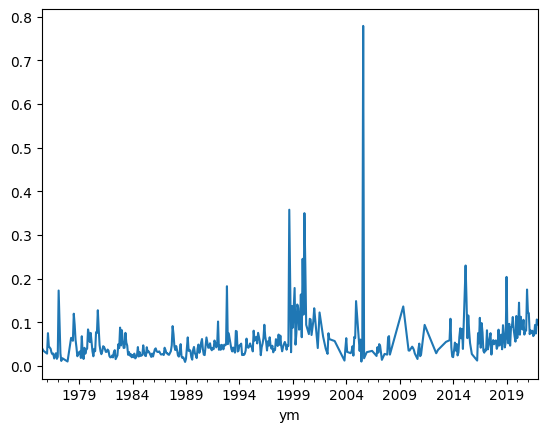

In [41]:
ipo_firms.groupby(['ym'])['ir_30day_vol'].median().plot()

In [19]:
ipo_info['issuedate']

0      1983-06-02
1      1983-06-02
2      1999-02-10
3      1999-02-10
4      1985-08-07
          ...    
9122   2021-12-14
9123   2021-12-16
9124   2021-12-22
9125   2021-05-14
9126   1998-04-17
Name: issuedate, Length: 9127, dtype: datetime64[ns]

In [17]:
ipo_info.columns

Index(['CUSIP', 'CUSIP9', 'Issuer/Borrower SIC', 'Issuer/Borrower SIC (Code)',
       'ticker', 'gross_spread', 'expenses', 'gross_spread_price',
       'gross_spread_principal', 'gross_spread_usd',
       'principal_amount_this_market', 'principal_amount_all_market',
       'primary_shares_this_market', 'primary_shares_all_market',
       'primary_amount_this_market', 'secondary_amount_this_market',
       'full_history', 'secondary_shares_this_market',
       'secondary_shares_all_market', 'proceeds_this_market',
       'proceeds_all_market', 'lead_managers', 'number_managers', 'zipcode',
       'ipo_flag', 'unit_flag', 'closed_flag', 'rule_144A', 'pipe',
       'issue_date', 'filing_date', 'prt_cusip', 'ult_cusip', 'sic', 'mainsic',
       'mainsiccode', 'sic2', 'sic_ex', 'pp_date', 'wd_date', 'lockup_date',
       'lockup_days', 'lockup', 'comanagers', 'comng_code', 'comng_short',
       'Number of Lead, Co-Lead & Co-Managers.1', 'issue_type', 'off_tech',
       'commit', 'mng_prt_

In [12]:
sdc_us_common.columns

Index(['CUSIP', 'CUSIP9', 'Issuer/Borrower SIC', 'Issuer/Borrower SIC (Code)',
       'ticker', 'gross_spread', 'expenses', 'gross_spread_price',
       'gross_spread_principal', 'gross_spread_usd',
       'principal_amount_this_market', 'principal_amount_all_market',
       'primary_shares_this_market', 'primary_shares_all_market',
       'primary_amount_this_market', 'secondary_amount_this_market',
       'full_history', 'secondary_shares_this_market',
       'secondary_shares_all_market', 'proceeds_this_market',
       'proceeds_all_market', 'lead_managers', 'number_managers', 'zipcode',
       'ipo_flag', 'unit_flag', 'closed_flag', 'rule_144A', 'pipe',
       'issue_date', 'filing_date', 'prt_cusip', 'ult_cusip', 'sic', 'mainsic',
       'mainsiccode', 'sic2', 'sic_ex', 'pp_date', 'wd_date', 'lockup_date',
       'lockup_days', 'lockup', 'comanagers', 'comng_code', 'comng_short',
       'Number of Lead, Co-Lead & Co-Managers.1', 'issue_type', 'off_tech',
       'commit', 'mng_prt_

In [8]:
ipo_info[['principal_amount_this_market','primary_shares_this_market','secondary_shares_this_market']].describe()

,principal_amount_this_market,primary_shares_this_market,secondary_shares_this_market
count,9127.000000,9.127000e+03,5.095000e+03
mean,108.114197,5.271925e+06,2.103946e+06
std,439.415109,1.368681e+07,1.313606e+07
min,0.500000,0.000000e+00,0.000000e+00
25%,14.000000,1.200000e+06,0.000000e+00
50%,36.400000,2.500000e+06,3.000000e+05
75%,89.650000,5.353500e+06,1.000000e+06
max,21767.214800,7.505903e+08,6.000000e+08


In [4]:
dsf_v2.columns

Index(['permno', 'dlycaldt', 'dlyprc', 'dlyret', 'dlyclose', 'dlyprcflg',
       'dlydelflg', 'vwretx', 'ewretx'],
      dtype='object')

In [4]:
%run ipo_functions.py
constructor = DataConstructor(data_path)

ipo_firms = constructor.ipo_firm_data(ipo_info,dsf_v2,compa)


/Users/taisei/Directory/ipo_matching/code/ipo_functions.py:322: SyntaxWarning: invalid escape sequence '\d'
  suffix='\d+'
/Users/taisei/Directory/ipo_matching/code/ipo_functions.py:614: SyntaxWarning: invalid escape sequence '\d'
  suffix='\d+'


In [6]:
ipo_firms.columns

Index(['IPOname', 'permno', 'CUSIP', 'mainsiccode', 'prt_cusip', 'ult_cusip',
       'issuedate', 'firmage', 'VCinGC', 'gross_spread_usd',
       'proceeds_all_market', 'dlycaldt', 'dlyprc', 'dlyret', 'dlyclose',
       'dlyprcflg', 'dlydelflg', 'vwretx', 'ewretx'],
      dtype='object')

In [12]:
ipo_firms['crsp_caldt_dif'] = np.abs((ipo_firms['dlycaldt'] - ipo_firms['issuedate']).dt.days)
ipo_firms_crsp_caldt_dif = ipo_firms.groupby(['permno'])['crsp_caldt_dif'].min().reset_index()
ipo_firms_crsp_caldt_dif['crsp_caldt_dif'].value_counts()











crsp_caldt_dif
0       5807
1       2947
3         62
2         45
4         36
        ... 
3957       1
231        1
131        1
253        1
15         1
Name: count, Length: 72, dtype: int64

In [57]:
ipo_info

,CUSIP,CUSIP9,Issuer/Borrower SIC,Issuer/Borrower SIC (Code),ticker,gross_spread,expenses,gross_spread_price,gross_spread_principal,gross_spread_usd,...,Rollup,Dual,PostIssueShares,Internet,permno,Founding,CUSIP8,issueyear,firmage,VCinGC
0,847598,NaN,Drawing and insulating of nonferrous wire,3357,SPTR,0.450,NaN,10.000,10.00000,0.100350,...,0.0,0.0,NaN,0.0,72072.0,1981.0,84759810,1983,2.0,1
1,847598,NaN,Drawing and insulating of nonferrous wire,3357,SPTR,0.595,2.348,8.500,8.50000,0.850850,...,0.0,0.0,NaN,0.0,72072.0,1981.0,84759810,1983,2.0,1
2,500643,NaN,Employment agencies,7361,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,NaN,0.0,86594.0,1969.0,500643200,1999,30.0,0
3,500643,500643200,Management consulting services;Employment agen...,8742;7361,KFY,0.875,NaN,6.250,6.25000,10.332625,...,0.0,0.0,NaN,0.0,86594.0,1969.0,500643200,1999,30.0,0
4,740814,NaN,Sporting and recreational goods and supplies;M...,5091;5399,PRST,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,NaN,0.0,63934.0,1912.0,74081400,1985,73.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9122,826165,826165102,"Electronic components, nec;Radio & TV broadcas...",3679;3663;4899,SIDU,0.3,3.600,6.0,6.0,0.900000,...,0.0,1.0,16200000.0,0.0,22602.0,2012.0,826165102,2021,9.0,0
9123,45258H,45258H106,Medical laboratories;Commercial physical and b...,8071;8731;8733;2836,IMMX,0.375,2.771,7.5,7.5,1.575000,...,0.0,0.0,NaN,0.0,22562.0,2012.0,45258H106,2021,9.0,1
9124,65344E,65344E107,Pharmaceutical preparations;Biological product...,2834;2836;8731,NXGL,0.385,2.469,7.0,7.0,0.995225,...,0.0,1.0,5564347.0,0.0,22586.0,2009.0,65344E107,2021,12.0,0
9125,25401N,25401N101,Children's and infants' wear stores;Catalog an...,5641;5961;5611;7375;5137;5621;5136,DBGI,0.02,5.349,8.0,8.0,0.747796,...,0.0,1.0,10492739.0,0.0,21280.0,2012.0,25401N101,2021,9.0,0


In [60]:
ipo_info.columns

Index(['CUSIP', 'CUSIP9', 'Issuer/Borrower SIC', 'Issuer/Borrower SIC (Code)',
       'ticker', 'gross_spread', 'expenses', 'gross_spread_price',
       'gross_spread_principal', 'gross_spread_usd',
       'principal_amount_this_market', 'principal_amount_all_market',
       'primary_shares_this_market', 'primary_shares_all_market',
       'primary_amount_this_market', 'secondary_amount_this_market',
       'full_history', 'secondary_shares_this_market',
       'secondary_shares_all_market', 'proceeds_this_market',
       'proceeds_all_market', 'lead_managers', 'number_managers', 'zipcode',
       'ipo_flag', 'unit_flag', 'closed_flag', 'rule_144A', 'pipe',
       'issue_date', 'filing_date', 'prt_cusip', 'ult_cusip', 'sic', 'mainsic',
       'mainsiccode', 'sic2', 'sic_ex', 'pp_date', 'wd_date', 'lockup_date',
       'lockup_days', 'lockup', 'comanagers', 'comng_code', 'comng_short',
       'Number of Lead, Co-Lead & Co-Managers.1', 'issue_type', 'off_tech',
       'commit', 'mng_prt_

In [59]:
compa = pd.read_pickle(data_path+'compa.pkl')
compq = pd.read_pickle(data_path+'compq.pkl')
dsf_v2 = pd.read_pickle(data_path+'dsf_v2.pkl')


In [52]:
ipo_info.columns

Index(['CUSIP', 'CUSIP9', 'Issuer/Borrower SIC', 'Issuer/Borrower SIC (Code)',
       'ticker', 'gross_spread', 'expenses', 'gross_spread_price',
       'gross_spread_principal', 'gross_spread_usd',
       'principal_amount_this_market', 'principal_amount_all_market',
       'primary_shares_this_market', 'primary_shares_all_market',
       'primary_amount_this_market', 'secondary_amount_this_market',
       'full_history', 'secondary_shares_this_market',
       'secondary_shares_all_market', 'proceeds_this_market',
       'proceeds_all_market', 'lead_managers', 'number_managers', 'zipcode',
       'ipo_flag', 'unit_flag', 'closed_flag', 'rule_144A', 'pipe',
       'issue_date', 'filing_date', 'prt_cusip', 'ult_cusip', 'sic', 'mainsic',
       'mainsiccode', 'sic2', 'sic_ex', 'pp_date', 'wd_date', 'lockup_date',
       'lockup_days', 'lockup', 'comanagers', 'comng_code', 'comng_short',
       'Number of Lead, Co-Lead & Co-Managers.1', 'issue_type', 'off_tech',
       'commit', 'mng_prt_

In [49]:
ipo_info.describe().T

,count,mean,std,min,25%,50%,75%,max
expenses,8231.0,3.763982e+00,2.293382e+01,0.0020,1.534500e+00,2.586000e+00,4.566000e+00,2.063333e+03
gross_spread_usd,9077.0,6.857358e+00,1.346342e+01,0.0480,1.088000e+00,2.849000e+00,6.987400e+00,3.122211e+02
principal_amount_this_market,9127.0,1.081142e+02,4.394151e+02,0.5000,1.400000e+01,3.640000e+01,8.965000e+01,2.176721e+04
principal_amount_all_market,9127.0,1.192465e+02,4.811120e+02,0.5000,1.400000e+01,3.800000e+01,9.500000e+01,2.176721e+04
primary_shares_this_market,9127.0,5.271925e+06,1.368681e+07,0.0000,1.200000e+06,2.500000e+06,5.353500e+06,7.505903e+08
primary_shares_all_market,5336.0,4.041102e+06,3.245510e+07,68548.0000,1.250000e+06,2.000000e+06,3.333333e+06,2.300000e+09
primary_amount_this_market,8881.0,8.656491e+01,2.877784e+02,0.4000,1.104000e+01,3.080000e+01,7.540500e+01,1.193400e+04
secondary_amount_this_market,3434.0,6.347563e+01,4.323142e+02,0.0014,3.400000e+00,8.400000e+00,2.596285e+01,1.577400e+04
secondary_shares_this_market,5095.0,2.103946e+06,1.313606e+07,0.0000,0.000000e+00,3.000000e+05,1.000000e+06,6.000000e+08
secondary_shares_all_market,3283.0,5.116912e+06,5.013365e+07,1.0000,3.000000e+05,6.500000e+05,1.723962e+06,2.000000e+09


In [47]:
ipo_info.columns

Index(['CUSIP', 'CUSIP9', 'Issuer/Borrower SIC', 'Issuer/Borrower SIC (Code)',
       'ticker', 'gross_spread', 'expenses', 'gross_spread_price',
       'gross_spread_principal', 'gross_spread_usd',
       'principal_amount_this_market', 'principal_amount_all_market',
       'primary_shares_this_market', 'primary_shares_all_market',
       'primary_amount_this_market', 'secondary_amount_this_market',
       'full_history', 'secondary_shares_this_market',
       'secondary_shares_all_market', 'proceeds_this_market',
       'proceeds_all_market', 'lead_managers', 'number_managers', 'zipcode',
       'ipo_flag', 'unit_flag', 'closed_flag', 'rule_144A', 'pipe',
       'issue_date', 'filing_date', 'prt_cusip', 'ult_cusip', 'sic', 'mainsic',
       'mainsiccode', 'sic2', 'sic_ex', 'pp_date', 'wd_date', 'lockup_date',
       'lockup_days', 'lockup', 'comanagers', 'comng_code', 'comng_short',
       'Number of Lead, Co-Lead & Co-Managers.1', 'issue_type', 'off_tech',
       'commit', 'mng_prt_

In [ ]:
uw_data = sdc_us_common.groupby(['mng_prt_code'])

In [41]:
all_matches

,CUSIP,prt_cusip,ult_cusip,mainsiccode,issuedate,permno,IPOname,manager_name,role,mng_prt_code,issueyear,num_managers,num_prt_codes
0,847598,847598,847598,3357.0,1983-06-02,72072.0,SPECTRAN CORP.,"Smith, Jackson & Co. Inc.",lead,SMITH-JACKSON,1983,3,3
1,847598,847598,847598,3357.0,1983-06-02,72072.0,SPECTRAN CORP.,Great Pacific Securities Corp.,co,GREAT-PAC-SEC,1983,3,3
2,847598,847598,847598,3357.0,1983-06-02,72072.0,SPECTRAN CORP.,Advest Inc,lead,BOFA-SEC-INC,1983,3,3
3,500643,500643,500643,7361.0,1999-02-10,86594.0,Korn/Ferry International,"Mitchum, Jones & Templeton, Inc.",lead,MITCHUM-JONES,1999,4,2
4,500643,500643,500643,7361.0,1999-02-10,86594.0,Korn/Ferry International,CS First Boston Corp,lead,UBS-BANK,1999,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31249,042068,J75963,J75963,3674.0,1998-04-17,85961.0,ARM Holdings PLC,Samuel A. Ramirez & Co.,co,NATWEST-GRP,1998,28,33
31250,042068,J75963,J75963,3674.0,1998-04-17,85961.0,ARM Holdings PLC,Rosenblatt Securities Inc,co,ROSENBLATT-SEC,1998,28,33
31251,042068,J75963,J75963,3674.0,1998-04-17,85961.0,ARM Holdings PLC,SG Americas Securities LLC,co,SOC-GEN,1998,28,33
31252,042068,J75963,J75963,3674.0,1998-04-17,85961.0,ARM Holdings PLC,Cowen & Co,co,TD-SECURITIES,1998,28,33


In [43]:
sdc_us_common.describe().T

,count,mean,std,min,25%,50%,75%,max
expenses,24205.0,2.503641e+00,1.409486e+01,0.000088,4.190000e-01,1.196000e+00,2.851000e+00,2.063333e+03
gross_spread_usd,27631.0,6.013351e+00,1.122111e+01,0.003142,1.044000e+00,2.750000e+00,6.600054e+00,3.122211e+02
principal_amount_this_market,30672.0,1.202993e+02,3.547545e+02,0.050000,1.296646e+01,4.160000e+01,1.120000e+02,2.176721e+04
principal_amount_all_market,30672.0,1.361254e+02,6.827849e+02,0.050000,1.300000e+01,4.250000e+01,1.173376e+02,6.681450e+04
primary_shares_this_market,30672.0,4.858954e+06,1.368604e+07,0.000000,5.500000e+05,2.000000e+06,5.000000e+06,8.288818e+08
primary_shares_all_market,16094.0,6.370806e+06,6.832646e+07,666.000000,1.500000e+06,2.500000e+06,5.000000e+06,5.751086e+09
primary_amount_this_market,26689.0,9.065770e+01,2.841169e+02,0.004680,1.000000e+01,3.200000e+01,8.400000e+01,1.608750e+04
secondary_amount_this_market,11698.0,1.085875e+02,3.355397e+02,0.001400,4.313545e+00,1.645377e+01,8.780923e+01,1.577400e+04
secondary_shares_this_market,20974.0,2.336494e+06,9.392931e+06,0.000000,0.000000e+00,1.100000e+05,1.158940e+06,6.000000e+08
secondary_shares_all_market,11416.0,6.353734e+06,5.606887e+07,1.000000,2.923450e+05,9.773410e+05,4.069780e+06,3.968085e+09


In [44]:
sdc_us_common.columns

Index(['CUSIP', 'CUSIP9', 'Issuer/Borrower SIC', 'Issuer/Borrower SIC (Code)',
       'ticker', 'gross_spread', 'expenses', 'gross_spread_price',
       'gross_spread_principal', 'gross_spread_usd',
       'principal_amount_this_market', 'principal_amount_all_market',
       'primary_shares_this_market', 'primary_shares_all_market',
       'primary_amount_this_market', 'secondary_amount_this_market',
       'full_history', 'secondary_shares_this_market',
       'secondary_shares_all_market', 'proceeds_this_market',
       'proceeds_all_market', 'lead_managers', 'number_managers', 'zipcode',
       'ipo_flag', 'unit_flag', 'closed_flag', 'rule_144A', 'pipe',
       'issue_date', 'filing_date', 'prt_cusip', 'ult_cusip', 'sic', 'mainsic',
       'mainsiccode', 'sic2', 'sic_ex', 'pp_date', 'wd_date', 'lockup_date',
       'lockup_days', 'lockup', 'comanagers', 'comng_code', 'comng_short',
       'Number of Lead, Co-Lead & Co-Managers.1', 'issue_type', 'off_tech',
       'commit', 'mng_prt_

In [30]:
uw_code_list

,manager_name,mng_prt_code
0,Clarksons Platou Securities AS,
1,"A. M. Levine & Co., Inc.",A-M-LEVINE
2,A.S. Goldmen & Company,A-S-GOLD
3,Arthur W. Wood Company Incorporated,A-WOOD
4,Arab Banking Corporation (ABC) Capital Markets...,ABC
...,...,...
1442,"Yee, Desmond, Schroeder and Allen, Inc.",YEE-DESMOND
1443,YLR Underwriting & Investments (1993) Ltd,YLR
1444,"Yorke McCarter Owen & Bartles, Inc.",YORKE
1445,Zelman Partners LLC,ZELMAN-PART


In [7]:
ipo_match.columns

Index(['CUSIP', 'CUSIP9', 'Issuer/Borrower SIC', 'Issuer/Borrower SIC (Code)',
       'ticker', 'gross_spread', 'expenses', 'gross_spread_price',
       'gross_spread_principal', 'gross_spread_usd',
       'principal_amount_this_market', 'principal_amount_all_market',
       'primary_shares_this_market', 'primary_shares_all_market',
       'primary_amount_this_market', 'secondary_amount_this_market',
       'full_history', 'secondary_shares_this_market',
       'secondary_shares_all_market', 'proceeds_this_market',
       'proceeds_all_market', 'lead_managers', 'number_managers', 'zipcode',
       'ipo_flag', 'unit_flag', 'closed_flag', 'rule_144A', 'pipe',
       'issue_date', 'filing_date', 'prt_cusip', 'ult_cusip', 'sic', 'mainsic',
       'mainsiccode', 'sic2', 'sic_ex', 'pp_date', 'wd_date', 'lockup_date',
       'lockup_days', 'lockup', 'comanagers', 'comng_code', 'comng_short',
       'Number of Lead, Co-Lead & Co-Managers.1', 'issue_type', 'off_tech',
       'commit', 'mng_prt_

In [11]:
sdc.columns

Index(['CUSIP', 'CUSIP9', 'Issuer/Borrower SIC', 'Issuer/Borrower SIC (Code)',
       'ticker', 'gross_spread', 'expenses', 'gross_spread_price',
       'gross_spread_principal', 'gross_spread_usd',
       'principal_amount_this_market', 'principal_amount_all_market',
       'primary_shares_this_market', 'primary_shares_all_market',
       'primary_amount_this_market', 'secondary_amount_this_market',
       'full_history', 'secondary_shares_this_market',
       'secondary_shares_all_market', 'proceeds_this_market',
       'proceeds_all_market', 'lead_managers', 'number_managers', 'zipcode',
       'ipo_flag', 'unit_flag', 'closed_flag', 'rule_144A', 'pipe',
       'issue_date', 'filing_date', 'prt_cusip', 'ult_cusip', 'sic', 'mainsic',
       'mainsiccode', 'sic2', 'sic_ex', 'pp_date', 'wd_date', 'lockup_date',
       'lockup_days', 'lockup', 'comanagers', 'comng_code', 'comng_short',
       'Number of Lead, Co-Lead & Co-Managers.1', 'issue_type', 'off_tech',
       'commit', 'mng_prt_

In [6]:
ipo_uw_match = pd.read_pickle(data_path+'ipo_uw_match.pkl')

In [9]:
ipo_cusip_list = ipo_uw_match['CUSIP'].unique()
ipo_cusip_list

array(['847598', '500643', '740814', ..., '65344E', '25401N', '042068'],
      dtype=object)